<div style="
    background-color: #f0f4f8;
    padding: 25px;
    border-radius: 10px;
    color: #2C3E50;
    font-family: 'Georgia', serif;
    line-height: 1.6;
    border: 1px solid #d6dee4;
">

<h1 style="margin-top: 0;">Análisis de factores de riesgo para infecciones nosocomiales en pacientes críticos mediante aprendizaje automático</h1>

<strong>22.536 - Trabajo Final de Grado</strong>  
<br>Grado en Ciencia de Datos Aplicada  
<br>Universitat Oberta de Catalunya  
<br>Curso académico 2024–2025/2

<hr>

<h3>Autor</h3>
<strong>Ahmad Yaman Omar Dallal</strong>  
<br>Email: yomar@uoc.edu  


<strong>Tutor: Xavier Florit Medina</strong>  

<hr>

<h3>Resumen</h3>

Este trabajo tiene como objetivo desarrollar un modelo de predicción del riesgo de infecciones nosocomiales en pacientes críticos hospitalizados, utilizando datos clínicos anonimizados del repositorio MIMIC-IV. Para ello se emplean técnicas de análisis exploratorio, ingeniería de variables y aprendizaje automático, priorizando tanto la precisión como la interpretabilidad de los modelos generados.

Se incorporan variables demográficas, administrativas, clínicas, farmacológicas y microbiológicas, evaluando su relevancia mediante enfoques tanto globales como locales de interpretabilidad. El resultado busca ofrecer una herramienta auxiliar para la toma de decisiones en entornos hospitalarios.

<hr>

<h3>Herramientas utilizadas</h3>
<ul>
  <li>Python 3.12</li>
  <li>Jupyter Notebook</li>
  <li>Pandas, NumPy, Matplotlib, Seaborn</li>
  <li>Scikit-learn, XGBoost, SHAP</li>
  <li>Dataset: MIMIC-IV Clinical Database Demo v2.2</li>
</ul>

<hr>

<h3>Fecha de entrega</h3>
Junio 2025

</div>


# Índice

1. [Introducción](#introducción)  
2. [Preparación y comprensión de los datos](#2-preparación-y-comprensión-de-los-datos)  
   - [2.1. Carga automatizada de datos hospitalarios y de UCI](#21-carga-automatizada-de-datos-hospitalarios-y-de-uci)  
   - [2.2. Exploración general de estructuras de datos](#22-exploración-general-de-estructuras-de-datos)  
   - [2.3. Evaluación de calidad de los datos](#23-evaluación-de-calidad-de-los-datos)  
     - [2.3.1. Análisis de valores nulos](#231-analisis-de-valores-nulos)
     - [2.3.2. Detección de registros duplicados](#232-detección-de-registros-duplicados)  
3. [Análisis exploratorio de datos (EDA)](#3-análisis-exploratorio-de-datos-eda)  
   - [3.1. Perfil demográfico y clínico](#31-perfil-demográfico-y-clínico)  
     - [3.1.1. Distribución de edad](#311-distribución-de-edad)  
     - [3.1.2. Estancia en UCI](#312-estancia-en-uci)  
     - [3.1.3. Procedimientos invasivos](#313-procedimientos-invasivos)  
     - [3.1.4. Uso de antibióticos](#314-uso-de-antibióticos)  
   - [3.2. Evaluación clínica de variables](#32-evaluación-clínica-de-variables)  
     - [3.2.1. Cultivos microbiológicos](#321-cultivos-microbiológicos)  
     - [3.2.2. Temperatura corporal](#322-temperatura-corporal)  
     - [3.2.3. Estancia hospitalaria y riesgo de infección](#323-estancia-hospitalaria-y-riesgo-de-infección)  
     - [3.2.4. Microorganismos más comunes](#324-microorganismos-más-comunes)  
     - [3.2.5. Otros signos vitales](#325-otros-signos-vitales)  
     - [3.2.6. Relación entre intervenciones y riesgo](#326-relación-entre-intervenciones-y-riesgo)  
4. [Ingeniería de características](#4-ingeniería-de-características)  
   - [4.1. Limpieza y transformación de variables](#41-limpieza-y-transformación-de-variables)  
   - [4.2. Tratamiento especializado de valores nulos](#42-tratamiento-especializado-de-valores-nulos)  
   - [4.3. Integración de tablas y consolidación del dataset](#43-integración-de-tablas-y-consolidación-del-dataset)  
   - [4.4. Exploración dirigida al modelado (EDA técnico)](#44-exploración-dirigida-al-modelado-eda-técnico)  
5. [Modelado predictivo](#5-modelado-predictivo)  
   - [5.1. Preparación del dataset para ML](#51-preparación-del-dataset-para-ml)  
   - [5.2. Entrenamiento de modelos supervisados](#52-entrenamiento-de-modelos-supervisados)  
   - [5.3. Evaluación de desempeño](#53-evaluación-de-desempeño)  
6. [Interpretabilidad del modelo](#6-interpretabilidad-del-modelo)  
   - [6.1. Importancia global de características](#61-importancia-global-de-características)  
   - [6.2. Interpretabilidad local con SHAP](#62-interpretabilidad-local-con-shap)

# 1. Introducción

El presente estudio tiene como objetivo desarrollar un modelo de predicción del riesgo de infecciones nosocomiales en pacientes críticos hospitalizados. Se busca identificar las variables clínicas más relevantes asociadas a la aparición de infecciones adquiridas durante la estancia hospitalaria y evaluar la capacidad predictiva de distintos algoritmos de aprendizaje automático.

Desde una perspectiva clínica, las infecciones nosocomiales representan una de las principales causas de morbilidad, mortalidad y prolongación de la estancia hospitalaria, especialmente en unidades de cuidados críticos. La identificación temprana de pacientes en riesgo permitiría implementar estrategias de prevención más efectivas, optimizar los recursos hospitalarios y mejorar los resultados clínicos. En este contexto, el análisis sistemático de datos clínicos mediante técnicas de machine learning constituye una herramienta de gran valor para apoyar la toma de decisiones médicas.

La base de datos utilizada en este estudio es MIMIC-IV (Medical Information Mart for Intensive Care, versión 4), un conjunto de datos de acceso abierto que contiene información detallada sobre pacientes hospitalizados. MIMIC-IV integra datos administrativos, resultados de laboratorio, signos vitales, medicaciones, procedimientos e informes microbiológicos, ofreciendo una fuente rica y heterogénea para el análisis de eventos clínicos complejos como las infecciones nosocomiales.

# 2. Preparación y comprensión de los datos

## 2.1. Carga automatizada de datos hospitalarios y de UCI

En esta sección se realiza la carga inicial de los datos provenientes de la base de datos MIMIC-IV. Esta base contiene información clínica desidentificada de pacientes ingresados en hospitales y unidades de cuidados intensivos, distribuida en múltiples archivos CSV organizados en dos carpetas principales: `hosp`, que contiene información general hospitalaria (admisiones, diagnósticos, procedimientos, prescripciones, etc.), e `icu`, que agrupa datos recogidos específicamente en contextos de UCI (signos vitales, eventos clínicos, estancias en UCI, etc.).

Para garantizar una carga eficiente y trazable, se implementan funciones modulares que automatizan la carga de los archivos disponibles en cada carpeta, normalizando sus nombres y almacenando los datos en un diccionario de DataFrames. Esto permite gestionar los conjuntos de datos de forma ordenada y centralizada a lo largo del análisis.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import shap

In [2]:
# Definimos la ruta base donde se encuentran los archivos de datos
ruta_principal = os.path.expanduser("~/Desktop/DS/TFG/mimic-iv-clinical-database-demo-2.2")

# Especificamos las rutas de las subcarpetas que contienen los datos hospitalarios y de la UCI
hosp_path = os.path.join(ruta_principal, "hosp")
icu_path = os.path.join(ruta_principal, "icu")

# Función para listar los archivos disponibles en una carpeta específica
# Esta función devuelve una lista con los nombres de los archivos en formato CSV o CSV comprimido (GZ)
def listar_archivos(ruta):
    return [f for f in os.listdir(ruta) if f.endswith('.csv') or f.endswith('.csv.gz')]

# Obtenemos la lista de archivos disponibles en cada carpeta
hosp_files = listar_archivos(hosp_path)
icu_files = listar_archivos(icu_path)

# Creamos un diccionario donde almacenaremos los DataFrames con los datos cargados
dataframes = {}

# Función para cargar los archivos CSV en un diccionario de DataFrames
# - Itera sobre la lista de archivos en la carpeta especificada
# - Intenta cargar cada archivo en un DataFrame utilizando pandas
# - Si ocurre un error durante la carga, lo captura y muestra un mensaje de advertencia
def cargar_archivos(archivos, carpeta, diccionario):
    for file in archivos:
        file_path = os.path.join(carpeta, file)  # Construimos la ruta completa del archivo
        try:
            df_name = file.replace(".csv", "").replace(".gz", "")  # Eliminamos extensiones para normalizar el nombre
            diccionario[df_name] = pd.read_csv(file_path, low_memory=False)  # Cargamos el archivo en un DataFrame
            filas, columnas = diccionario[df_name].shape  # Obtenemos las dimensiones del DataFrame
            print(f"✔ {df_name}: {filas} filas, {columnas} columnas.")  # Imprimimos un mensaje de confirmación
        except Exception as e:
            print(f"⚠️ Error al cargar {file}: {e}")  # En caso de error, informamos al usuario

# Llamamos a la función para cargar los archivos de la carpeta hosp
print("📂 Cargando archivos de hospitalización...")
cargar_archivos(hosp_files, hosp_path, dataframes)

# Llamamos a la función para cargar los archivos de la carpeta icu
print("\n📂 Cargando archivos de UCI...")
cargar_archivos(icu_files, icu_path, dataframes)

# Imprimimos un resumen de la carga de datos
print(f"\n✅ Proceso completado: {len(dataframes)} archivos cargados correctamente.")

📂 Cargando archivos de hospitalización...
✔ admissions: 275 filas, 16 columnas.
✔ diagnoses_icd: 4506 filas, 5 columnas.
✔ drgcodes: 454 filas, 7 columnas.
✔ d_hcpcs: 89200 filas, 4 columnas.
✔ d_icd_diagnoses: 109775 filas, 3 columnas.
✔ d_icd_procedures: 85257 filas, 3 columnas.
✔ d_labitems: 1622 filas, 4 columnas.
✔ emar: 35835 filas, 12 columnas.
✔ emar_detail: 72018 filas, 33 columnas.
✔ hcpcsevents: 61 filas, 6 columnas.
✔ labevents: 107727 filas, 16 columnas.
✔ microbiologyevents: 2899 filas, 25 columnas.
✔ omr: 2964 filas, 5 columnas.
✔ patients: 100 filas, 6 columnas.
✔ pharmacy: 15306 filas, 27 columnas.
✔ poe: 45154 filas, 12 columnas.
✔ poe_detail: 3795 filas, 5 columnas.
✔ prescriptions: 18087 filas, 21 columnas.
✔ procedures_icd: 722 filas, 6 columnas.
✔ provider: 40508 filas, 1 columnas.
✔ services: 319 filas, 5 columnas.
✔ transfers: 1190 filas, 7 columnas.

📂 Cargando archivos de UCI...
✔ caregiver: 15468 filas, 1 columnas.
✔ chartevents: 668862 filas, 11 columnas.
✔ 

Tras ejecutar el bloque anterior, se confirma la correcta carga de los 31 archivos clínicos disponibles, que serán utilizados a lo largo del análisis. Esta preparación es crucial para garantizar la trazabilidad, reproducibilidad y limpieza del pipeline analítico, ya que permite acceder a cada conjunto de datos de forma estructurada a través de un único diccionario indexado por nombre de archivo.

## 2.2. Exploración general de estructuras de datos

Antes de realizar cualquier análisis estadístico o transformación de variables, es fundamental inspeccionar la estructura general de cada uno de los conjuntos de datos cargados. Esta revisión incluye la observación de las primeras filas de cada DataFrame y un resumen de sus columnas, tipos de datos y presencia de valores nulos.

Con este propósito, se define una función que recorre el diccionario de datos cargados y, para cada conjunto, muestra una muestra representativa del contenido así como un resumen técnico utilizando `df.info()`. Esta práctica permite detectar desde el inicio posibles inconsistencias, columnas irrelevantes o mal tipificadas, y evaluar la dimensión y granularidad de cada tabla.


In [3]:
# Exploración de la información en los datos cargados

# Función para visualizar información general de cada conjunto de datos
# Se imprimen las primeras filas y la estructura de las variables en cada DataFrame
def explorar_estructura(diccionario):
    for nombre, df in diccionario.items():
        print(f"\n📌 Exploración del dataset: {nombre}")
        print(df.head())  # Muestra las primeras filas del DataFrame
        print("\n📊 Información general:")
        print(df.info())  # Proporciona detalles sobre tipos de datos y valores nulos
        print("-" * 80)  # Separador visual para mejorar la legibilidad

# Ejecutamos la exploración de la estructura de los datos
print("🔍 Analizando la estructura de los datos cargados...\n")
explorar_estructura(dataframes)

🔍 Analizando la estructura de los datos cargados...


📌 Exploración del dataset: admissions
   subject_id   hadm_id            admittime            dischtime  \
0    10004235  24181354  2196-02-24 14:38:00  2196-03-04 14:02:00   
1    10009628  25926192  2153-09-17 17:08:00  2153-09-25 13:20:00   
2    10018081  23983182  2134-08-18 02:02:00  2134-08-23 19:35:00   
3    10006053  22942076  2111-11-13 23:39:00  2111-11-15 17:20:00   
4    10031404  21606243  2113-08-04 18:46:00  2113-08-06 20:57:00   

             deathtime admission_type admit_provider_id  \
0                  NaN         URGENT            P03YMR   
1                  NaN         URGENT            P41R5N   
2                  NaN         URGENT            P233F6   
3  2111-11-15 17:20:00         URGENT            P38TI6   
4                  NaN         URGENT            P07HDB   

       admission_location        discharge_location insurance language  \
0  TRANSFER FROM HOSPITAL  SKILLED NURSING FACILITY  Medicaid  E

Esta primera inspección visual y estructural permite familiarizarse con los distintos tipos de registros disponibles, identificar variables clave y anticipar procesos de limpieza o transformación necesarios. Además, ayuda a verificar que los archivos han sido correctamente cargados y que las columnas relevantes están presentes y correctamente etiquetadas.

## 2.3. Evaluación de calidad de los datos
### 2.3.1. Análisis de valores nulos

Una etapa esencial dentro del análisis exploratorio inicial es la detección de valores ausentes o incompletos en los datos. La presencia de valores nulos puede afectar la integridad del análisis, especialmente en contextos clínicos donde los registros incompletos pueden sesgar las conclusiones.

Con el fin de detectar estas ausencias, se implementa una función que calcula el porcentaje de valores nulos por columna en cada uno de los conjuntos de datos. Se imprimen únicamente aquellas variables que presentan datos faltantes, lo que permite priorizar intervenciones de imputación, exclusión o interpretación clínica de los vacíos. Esta revisión sistemática ayuda a entender la calidad general de los datos y orientar decisiones posteriores de limpieza.

In [4]:
# Evaluación de valores nulos en los datos

# Función para calcular y visualizar el porcentaje de valores nulos en cada columna
def analizar_valores_nulos(diccionario):
    for nombre, df in diccionario.items():
        print(f"\n📌 Análisis de valores nulos en: {nombre}")
        porcentaje_nulos = df.isnull().sum() / len(df) * 100  # Calcula el porcentaje de nulos
        print(porcentaje_nulos[porcentaje_nulos > 0])  # Muestra solo las columnas con valores nulos
        print("-" * 80)  # Separador visual

# Ejecutamos el análisis de valores nulos en los conjuntos de datos
print("🔍 Identificando valores nulos en las variables...\n")
analizar_valores_nulos(dataframes)

🔍 Identificando valores nulos en las variables...


📌 Análisis de valores nulos en: admissions
deathtime             94.545455
discharge_location    15.272727
marital_status         4.363636
edregtime             33.818182
edouttime             33.818182
dtype: float64
--------------------------------------------------------------------------------

📌 Análisis de valores nulos en: diagnoses_icd
Series([], dtype: float64)
--------------------------------------------------------------------------------

📌 Análisis de valores nulos en: drgcodes
drg_severity     51.321586
drg_mortality    51.321586
dtype: float64
--------------------------------------------------------------------------------

📌 Análisis de valores nulos en: d_hcpcs
category             7.672646
long_description    92.376682
dtype: float64
--------------------------------------------------------------------------------

📌 Análisis de valores nulos en: d_icd_diagnoses
Series([], dtype: float64)
-----------------------------

El resultado obtenido permite observar patrones de ausencia de datos que no son aleatorios. Algunas variables presentan un porcentaje elevado de valores nulos, lo cual es habitual en contextos clínicos debido a la variabilidad en la práctica asistencial. Esta información será clave para tomar decisiones informadas en los pasos posteriores de ingeniería de características y modelado.

### 2.3.2. Detección de registros duplicados

Además de los valores ausentes, otro aspecto fundamental en el control de calidad de los datos es la detección de registros duplicados. Las duplicaciones pueden surgir por errores de carga, múltiples registros para el mismo evento, o procesos redundantes de documentación clínica.

Se implementa una función que recorre cada conjunto de datos y cuantifica los registros duplicados exactos. La detección temprana de estas redundancias permite evitar distorsiones en estadísticas descriptivas, estimaciones y modelos predictivos. Esta verificación contribuye a garantizar la unicidad y consistencia de los datos antes de cualquier integración o análisis agregado.


In [5]:
# Detección de registros duplicados en los datos

# Función para contar el número de registros duplicados en cada dataset
def detectar_duplicados(diccionario):
    for nombre, df in diccionario.items():
        duplicados = df.duplicated().sum()  # Cuenta el número de registros duplicados
        print(f"📌 {nombre}: {duplicados} registros duplicados detectados.")

# Ejecutamos la función para evaluar duplicados en los datos
print("\n🔍 Evaluando la presencia de registros duplicados...\n")
detectar_duplicados(dataframes)


🔍 Evaluando la presencia de registros duplicados...

📌 admissions: 0 registros duplicados detectados.
📌 diagnoses_icd: 0 registros duplicados detectados.
📌 drgcodes: 0 registros duplicados detectados.
📌 d_hcpcs: 0 registros duplicados detectados.
📌 d_icd_diagnoses: 0 registros duplicados detectados.
📌 d_icd_procedures: 0 registros duplicados detectados.
📌 d_labitems: 0 registros duplicados detectados.
📌 emar: 0 registros duplicados detectados.
📌 emar_detail: 0 registros duplicados detectados.
📌 hcpcsevents: 0 registros duplicados detectados.
📌 labevents: 0 registros duplicados detectados.
📌 microbiologyevents: 0 registros duplicados detectados.
📌 omr: 0 registros duplicados detectados.
📌 patients: 0 registros duplicados detectados.
📌 pharmacy: 0 registros duplicados detectados.
📌 poe: 0 registros duplicados detectados.
📌 poe_detail: 0 registros duplicados detectados.
📌 prescriptions: 0 registros duplicados detectados.
📌 procedures_icd: 0 registros duplicados detectados.
📌 provider: 0 

A partir de esta revisión, es posible tomar decisiones informadas sobre la depuración del dataset, como aplicar reglas de agregación o eliminar duplicados, según el contexto clínico. Junto con el análisis de valores nulos, se consolida así el diagnóstico inicial de la calidad del conjunto. Cabe destacar que no se identificaron registros duplicados.

# 3. Análisis exploratorio de datos (EDA)


## 3.1. Perfil demográfico y clínico
### 3.1.1. Distribución de edad

Como parte del análisis exploratorio, se procede a representar gráficamente la distribución de algunas variables clínicas clave. La visualización de la variable `anchor_age`, que indica la edad del paciente en el momento de la admisión hospitalaria, permite caracterizar la población bajo estudio desde una perspectiva demográfica.

El análisis de la edad es especialmente relevante en estudios de infecciones nosocomiales, dado que la edad avanzada se asocia con mayor vulnerabilidad inmunológica, estancia hospitalaria prolongada y mayor riesgo de complicaciones. A través de un histograma, se representa la frecuencia de pacientes en intervalos de edad, facilitando la interpretación de su distribución y la identificación de posibles sesgos poblacionales en el dataset.

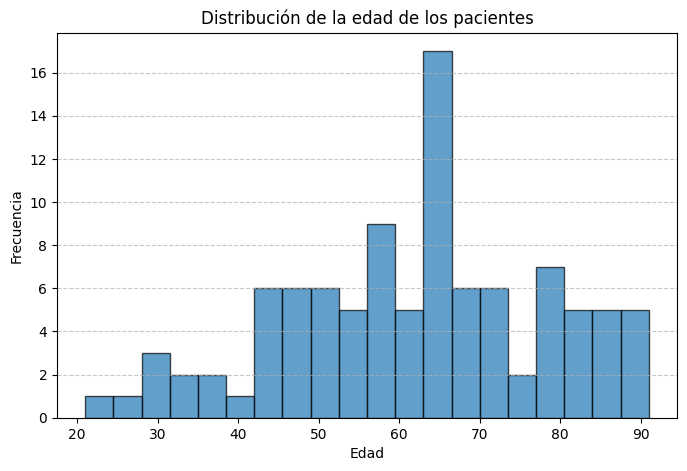

In [6]:
import matplotlib.pyplot as plt

# Análisis de la edad de los pacientes
if "patients" in dataframes:
    patients_df = dataframes["patients"]
    if "anchor_age" in patients_df.columns:
        plt.figure(figsize=(8,5))
        plt.hist(patients_df["anchor_age"].dropna(), bins=20, edgecolor='black', alpha=0.7)
        plt.xlabel("Edad")
        plt.ylabel("Frecuencia")
        plt.title("Distribución de la edad de los pacientes")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

El histograma resultante ofrece una visión clara de cómo se distribuyen las edades entre los pacientes registrados. Esta información no solo es útil para describir la cohorte, sino también para futuras decisiones de segmentación, normalización de variables o análisis estratificado por grupos etarios.

### 3.1.2. Estancia en UCI

La estancia en la unidad de cuidados intensivos (UCI) es un indicador relevante tanto desde el punto de vista clínico como operativo. Se trata de un entorno de alta complejidad donde los pacientes permanecen bajo monitorización constante, frecuentemente expuestos a procedimientos invasivos, dispositivos médicos y antibióticos de amplio espectro.

Mediante un histograma, se representa la distribución de la variable `los` (length of stay) contenida en la tabla `icustays`, que refleja la duración de la estancia en UCI en días. Esta visualización permite observar si existen sesgos, agrupamientos o valores extremos en la duración de las estancias, lo cual puede influir en la probabilidad de desarrollar infecciones nosocomiales y en el enfoque del modelado posterior.


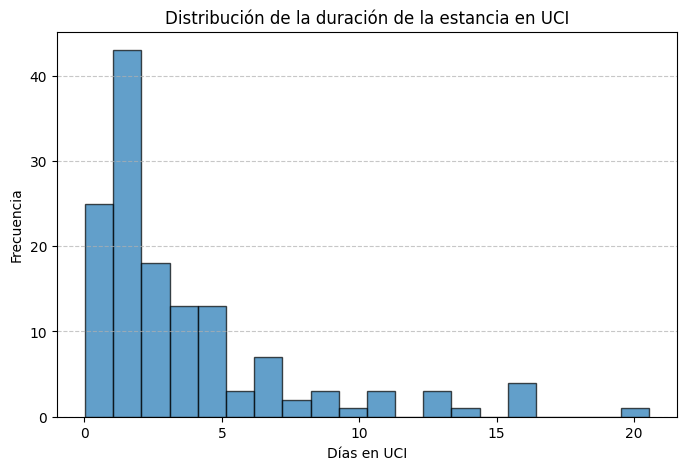

In [7]:
# Análisis de la duración de la estancia en UCI
if "icustays" in dataframes:
    icu_df = dataframes["icustays"]
    if "los" in icu_df.columns:  # 'los' representa length of stay (duración de la estancia)
        plt.figure(figsize=(8,5))
        plt.hist(icu_df["los"].dropna(), bins=20, edgecolor='black', alpha=0.7)
        plt.xlabel("Días en UCI")
        plt.ylabel("Frecuencia")
        plt.title("Distribución de la duración de la estancia en UCI")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

El patrón de distribución observado en esta variable ofrece información clave sobre el perfil de gravedad de los pacientes estudiados. Estancias prolongadas pueden estar relacionadas tanto con mayor complejidad clínica como con un incremento en el riesgo acumulado de infecciones adquiridas durante la hospitalización.

### 3.1.3. Procedimientos invasivos

Los procedimientos invasivos son una de las principales vías de entrada para infecciones nosocomiales, ya que implican la ruptura de barreras anatómicas y la introducción de dispositivos o técnicas que pueden facilitar la colonización bacteriana. Por tanto, su análisis preliminar es esencial en este contexto.

En este bloque se analiza la frecuencia de aparición de los códigos ICD asociados a procedimientos registrados en la tabla `procedures_icd`. Se identifican los diez más comunes y se representan gráficamente para observar su peso relativo dentro del conjunto de datos. Esta visualización ofrece una primera aproximación a las intervenciones más frecuentes en la cohorte estudiada, y permite anticipar su posible influencia en el modelado del riesgo infeccioso.

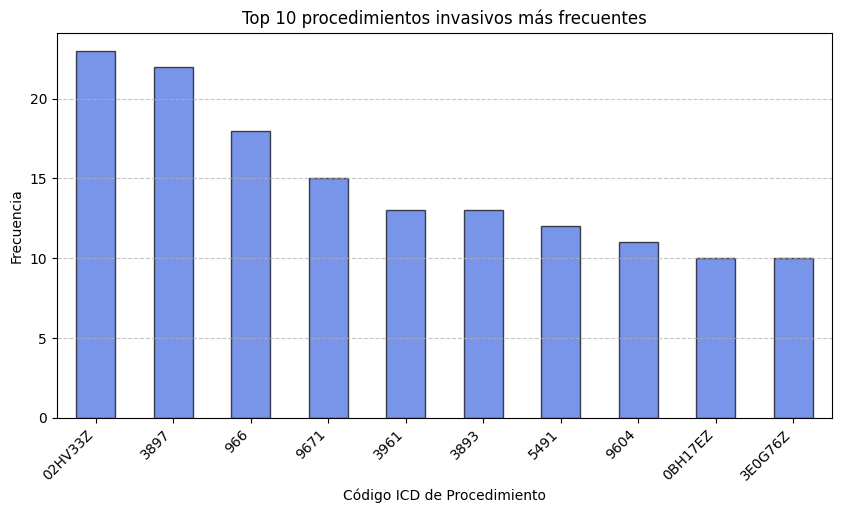

In [8]:
# Análisis de la frecuencia de procedimientos invasivos
if "procedures_icd" in dataframes:
    procedures_df = dataframes["procedures_icd"]
    if "icd_code" in procedures_df.columns:
        top_procedures = procedures_df["icd_code"].value_counts().head(10)
        
        plt.figure(figsize=(10,5))
        top_procedures.plot(kind="bar", color="royalblue", edgecolor="black", alpha=0.7)
        plt.xlabel("Código ICD de Procedimiento")
        plt.ylabel("Frecuencia")
        plt.title("Top 10 procedimientos invasivos más frecuentes")
        plt.xticks(rotation=45, ha="right")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

El conocimiento de los procedimientos más prevalentes es útil para entender la naturaleza de las estancias hospitalarias analizadas, así como para explorar posteriormente su correlación con la aparición de infecciones nosocomiales.

### 3.1.4. Uso de medicamentos

En el contexto hospitalario, la administración de antibióticos suele estar asociada a la sospecha o confirmación de procesos infecciosos. Por este motivo, la frecuencia con la que se prescriben ciertos fármacos puede servir como indicador indirecto de infecciones nosocomiales, especialmente en unidades críticas.

El siguiente análisis explora los medicamentos registrados en la tabla `prescriptions`, identificando los diez más prescritos en la cohorte estudiada. El objetivo es identificar patrones terapéuticos frecuentes que puedan correlacionarse con situaciones clínicas de riesgo o con intervenciones empíricas ante infecciones confirmadas o sospechadas.

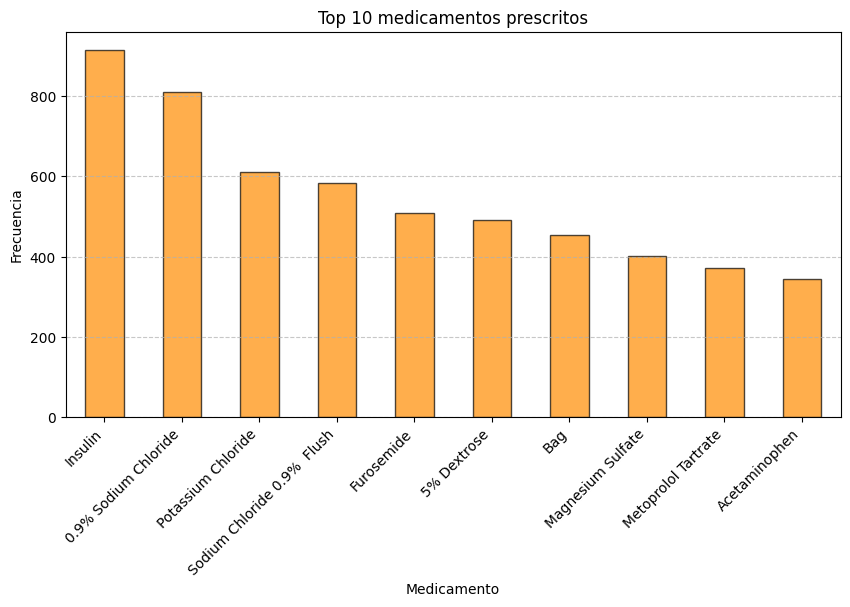

In [9]:
# Análisis del uso de medicamentos como posible marcador de infección nosocomial
if "prescriptions" in dataframes:
    prescriptions_df = dataframes["prescriptions"]
    if "drug" in prescriptions_df.columns:
        top_antibiotics = prescriptions_df["drug"].value_counts().head(10)
        
        plt.figure(figsize=(10,5))
        top_antibiotics.plot(kind="bar", color="darkorange", edgecolor="black", alpha=0.7)
        plt.xlabel("Medicamento")
        plt.ylabel("Frecuencia")
        plt.title("Top 10 medicamentos prescritos")
        plt.xticks(rotation=45, ha="right")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

Los resultados obtenidos permiten observar cuáles son los antibióticos más utilizados en el entorno hospitalario de la muestra, lo cual puede estar relacionado con la prevalencia de determinadas infecciones o con protocolos específicos de tratamiento. Esta información puede integrarse más adelante como variable explicativa o servir como criterio para definir la presencia de una posible infección nosocomial.

## 3.2. Evaluación clínica de variables

### 3.2.1. Cultivos microbiológicos

La obtención y análisis de muestras microbiológicas representa uno de los criterios clínicos más robustos para el diagnóstico de infecciones nosocomiales. A diferencia de otros indicadores indirectos como la prescripción de antibióticos, los cultivos reflejan evidencia directa de la presencia de agentes patógenos en el paciente.

El presente análisis examina la columna `spec_type_desc` de la tabla `microbiologyevents`, la cual contiene descripciones textuales del tipo de muestra obtenida (sangre, orina, secreciones, etc.). Se seleccionan los diez tipos de muestras más frecuentes y se visualizan en forma de gráfico de barras, lo que permite entender en qué contextos clínicos se producen más evaluaciones microbiológicas.


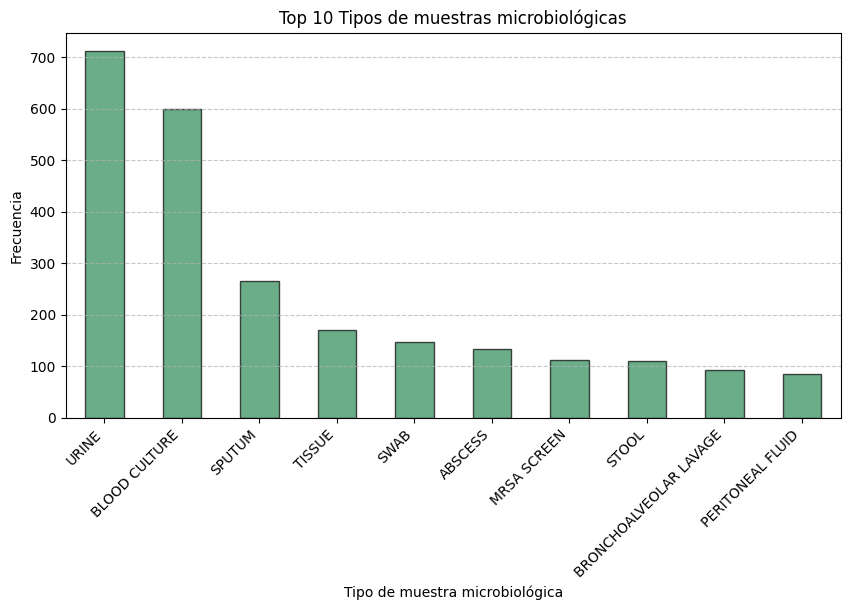

In [10]:
# Análisis de cultivos microbiológicos para detectar infecciones nosocomiales
if "microbiologyevents" in dataframes:
    microbiology_df = dataframes["microbiologyevents"]
    if "spec_type_desc" in microbiology_df.columns:
        top_micro_samples = microbiology_df["spec_type_desc"].value_counts().head(10)
        
        plt.figure(figsize=(10,5))
        top_micro_samples.plot(kind="bar", color="seagreen", edgecolor="black", alpha=0.7)
        plt.xlabel("Tipo de muestra microbiológica")
        plt.ylabel("Frecuencia")
        plt.title("Top 10 Tipos de muestras microbiológicas")
        plt.xticks(rotation=45, ha="right")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

Este análisis proporciona una visión concreta de los métodos diagnósticos empleados en el seguimiento de pacientes hospitalizados. La distribución observada de tipos de muestras microbiológicas permite identificar los focos clínicos más habituales de infección y puede utilizarse como criterio operativo para definir una infección nosocomial confirmada.

### 3.2.2. Temperatura corporal

Entre los signos vitales, la temperatura corporal es uno de los indicadores más sensibles y utilizados para la detección de procesos infecciosos agudos. En el contexto de cuidados críticos, alteraciones térmicas como fiebre o hipotermia pueden ser manifestaciones tempranas de una infección nosocomial o sistémica.

En este bloque se extraen los valores de temperatura corporal registrados en la tabla `chartevents`, utilizando los identificadores estandarizados de ítems correspondientes a medición de temperatura (itemid 223762 y 676). Posteriormente, se representa la distribución de estos valores mediante un histograma, que permite observar el rango habitual y detectar patrones atípicos que podrían asociarse a eventos infecciosos.


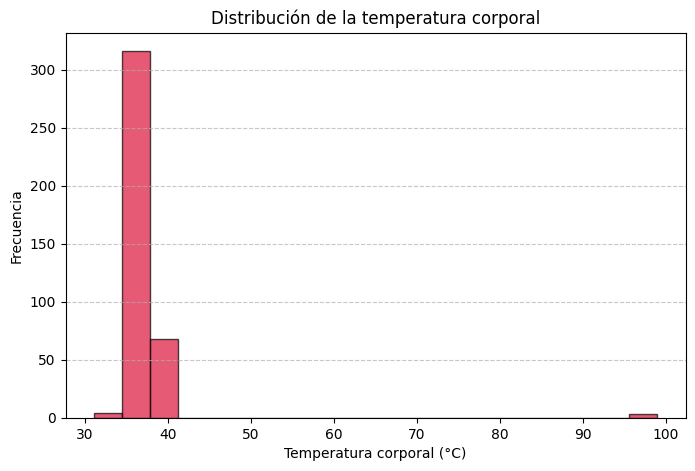

In [11]:
# Análisis de signos vitales (temperatura) para posibles indicadores de infección
if "chartevents" in dataframes:
    chartevents_df = dataframes["chartevents"]
    if "valuenum" in chartevents_df.columns and "itemid" in chartevents_df.columns:
        # Filtrar por itemid de temperatura (si está disponible)
        temperature_values = chartevents_df[chartevents_df["itemid"].isin([223762, 676])]["valuenum"].dropna()
        
        if not temperature_values.empty:
            plt.figure(figsize=(8,5))
            plt.hist(temperature_values, bins=20, color="crimson", edgecolor="black", alpha=0.7)
            plt.xlabel("Temperatura corporal (°C)")
            plt.ylabel("Frecuencia")
            plt.title("Distribución de la temperatura corporal")
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

El análisis de la distribución de temperatura permite evaluar si existen valores fuera del rango fisiológico típico que podrían corresponderse con episodios febriles. Esta variable será considerada posteriormente en el diseño del modelo predictivo como un posible indicador temprano de infección adquirida durante la hospitalización. Se puede observar que hay algún registro fuera del rango habitual para la medición de esta variable.

### 3.2.3. Estancia hospitalaria y riesgo de infección

Una de las consecuencias más estudiadas de las infecciones nosocomiales es el aumento de la duración de la estancia hospitalaria. Esta prolongación no solo impacta en el pronóstico del paciente, sino que también supone una mayor carga asistencial y costes para el sistema de salud.

En este bloque se construye una variable binaria (`infeccion_nosocomial`) a partir de la tabla `microbiologyevents`, identificando aquellos pacientes que presentan cultivos microbiológicos registrados durante su estancia. Esta variable se integra en la tabla `admissions` para comparar, mediante diagramas de caja, la duración de la hospitalización entre pacientes con y sin infección confirmada.

Previamente, se realiza el cálculo de la variable `los` (length of stay) como la diferencia entre la fecha de alta (`dischtime`) y la fecha de ingreso (`admittime`), expresada en días.

📌 *Definición de infección nosocomial (criterio medio)*  
Se considera que un paciente ha desarrollado una infección nosocomial si cumple al menos uno de los siguientes criterios:
- Tiene un cultivo microbiológico positivo igual o posterior a 48 horas después de su ingreso.
- Recibe una prescripción de antibacteriano genérico (identificado mediante patrones textuales como “cillin”, “mycin”, “floxacin”, etc.) igual o posterior a 48 horas tras el ingreso.

Esta definición busca equilibrar sensibilidad clínica con disponibilidad de datos, superando las limitaciones de usar únicamente una lista cerrada de antibióticos o exigir ambos criterios.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Verificamos que los DataFrames necesarios están disponibles
if {"admissions", "microbiologyevents", "prescriptions"}.issubset(dataframes.keys()):
    admissions_df = dataframes["admissions"]
    micro_df = dataframes["microbiologyevents"]
    presc_df = dataframes["prescriptions"]

    # Convertimos a datetime las columnas necesarias
    admissions_df["admittime"] = pd.to_datetime(admissions_df["admittime"], errors="coerce")
    admissions_df["dischtime"] = pd.to_datetime(admissions_df["dischtime"], errors="coerce")
    micro_df["chartdate"] = pd.to_datetime(micro_df["chartdate"], errors="coerce")
    presc_df["starttime"] = pd.to_datetime(presc_df["starttime"], errors="coerce")

    # 1️⃣ Pacientes con cultivo positivo ≥ 48h tras admisión
    positivos = micro_df[micro_df["org_name"].notnull()].copy()
    positivos = positivos.merge(admissions_df[["hadm_id", "admittime"]], on="hadm_id", how="left")
    positivos = positivos[positivos["chartdate"] >= positivos["admittime"] + timedelta(hours=48)]
    cultivos_ids = positivos["hadm_id"].dropna().unique()

    # 2️⃣ Pacientes con prescripción ≥ 48h tras admisión que parece antibiótico (según patrones genéricos)
    patrones = ["cillin", "mycin", "floxacin", "cef", "penem", "tetracycline", "aztreonam", "oxacin", "mide", "trimethoprim"]
    presc_df = presc_df.merge(admissions_df[["hadm_id", "admittime"]], on="hadm_id", how="left")
    presc_df = presc_df[presc_df["starttime"] >= presc_df["admittime"] + timedelta(hours=48)]
    presc_df["is_antibiotic_like"] = presc_df["drug"].str.lower().str.contains('|'.join(patrones), na=False)
    presc_ids = presc_df[presc_df["is_antibiotic_like"]]["hadm_id"].dropna().unique()

    # 3️⃣ Criterio OR: al menos uno de los dos
    infeccion_ids = set(cultivos_ids).union(set(presc_ids))

    # 4️⃣ Añadimos columna de infección al dataframe de admisiones
    admissions_df["infeccion_nosocomial"] = admissions_df["hadm_id"].apply(lambda x: 1 if x in infeccion_ids else 0)

    # 5️⃣ Visualización de estancia hospitalaria según infección
    if "los" in admissions_df.columns:
        plt.figure(figsize=(8, 5))
        admissions_df.boxplot(column="los", by="infeccion_nosocomial", grid=False)
        plt.xlabel("Presencia de Infección Nosocomial (0 = No, 1 = Sí)")
        plt.ylabel("Duración de la Estancia Hospitalaria (Días)")
        plt.title("Estancia hospitalaria según infección nosocomial")
        plt.suptitle("")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    # 6️⃣ Información final
    print(f"✔ Pacientes totales: {len(admissions_df)}")
    print(f"✔ Pacientes con infección nosocomial (criterio medio): {admissions_df['infeccion_nosocomial'].sum()}")

else:
    print("Faltan uno o más DataFrames necesarios: 'admissions', 'microbiologyevents' o 'prescriptions'.")

✔ Pacientes totales: 275
✔ Pacientes con infección nosocomial (criterio medio): 138


La visualización obtenida muestra de forma directa el impacto que tiene la aparición de una infección nosocomial sobre el tiempo de hospitalización. Esta relación refuerza la hipótesis de que variables temporales y microbiológicas pueden jugar un papel central en los modelos predictivos posteriores, y justifica su inclusión explícita como características clínicas relevantes.


### 3.2.4. Microorganismos más comunes

Conocer los microorganismos más frecuentemente aislados en los cultivos microbiológicos es fundamental para caracterizar el perfil etiológico de las infecciones nosocomiales. Esta información no solo permite validar la presencia de procesos infecciosos reales en los pacientes identificados como infectados, sino que también orienta sobre los agentes patógenos predominantes en el entorno hospitalario.

En este bloque se analizan los registros de la columna `org_name` de la tabla `microbiologyevents`, la cual identifica el microorganismo aislado en cada cultivo. Se representan los diez más frecuentes, lo cual permite observar si existen patrones predominantes, como la prevalencia de ciertas bacterias gramnegativas, grampositivas u hongos.


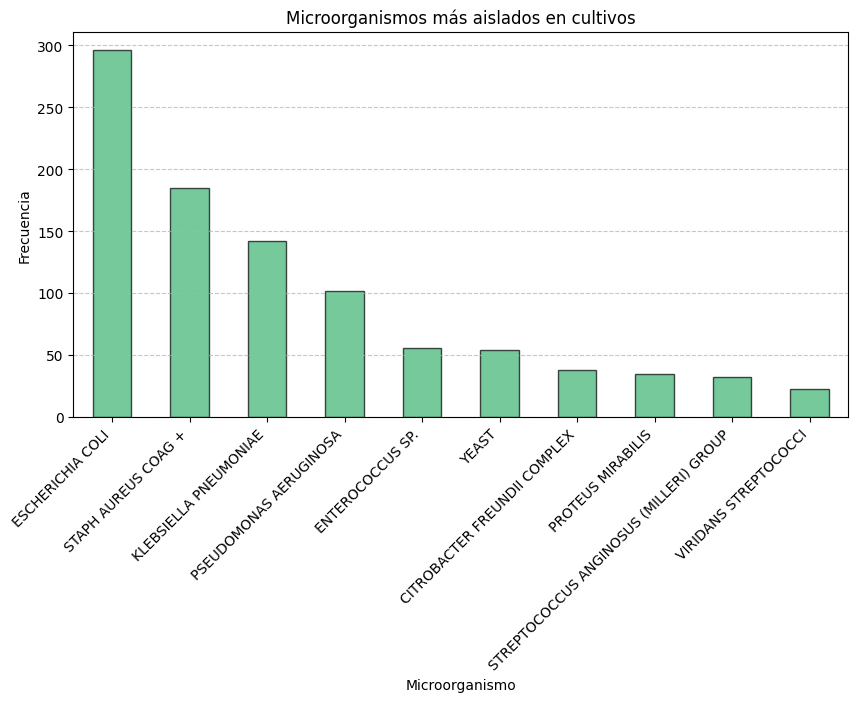

In [13]:
# Tipos de microorganismos aislados

if "microbiologyevents" in dataframes:
    microbiology_df = dataframes["microbiologyevents"]
    
    if "org_name" in microbiology_df.columns:
        top_microbes = microbiology_df["org_name"].value_counts().head(10)

        plt.figure(figsize=(10,5))
        top_microbes.plot(kind="bar", color="mediumseagreen", edgecolor="black", alpha=0.7)
        plt.title("Microorganismos más aislados en cultivos")
        plt.ylabel("Frecuencia")
        plt.xlabel("Microorganismo")
        plt.xticks(rotation=45, ha="right")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


Este análisis proporciona una visión detallada sobre los agentes infecciosos más relevantes en la cohorte estudiada. La identificación de los microorganismos predominantes puede complementar la interpretación del uso de antibióticos y enriquecer el modelo predictivo, incorporando información sobre el entorno microbiológico hospitalario.


### 3.2.5. Otros signos vitales

Además de la temperatura corporal, otros signos vitales como la frecuencia cardíaca (Heart Rate), la presión arterial sistólica y diastólica (SBP y DBP) y la saturación de oxígeno (SpO2) ofrecen información crítica sobre el estado hemodinámico y respiratorio del paciente. Alteraciones en estos parámetros pueden reflejar la aparición de un proceso infeccioso, una respuesta inflamatoria sistémica o una descompensación clínica.

En este bloque se extraen y visualizan, a través de histogramas, los valores de estos signos vitales registrados en la tabla `chartevents`, utilizando los identificadores estandarizados `itemid` del sistema MIMIC-IV. El objetivo es explorar su distribución y evaluar su posible utilidad como predictores tempranos en un modelo de riesgo de infección nosocomial.


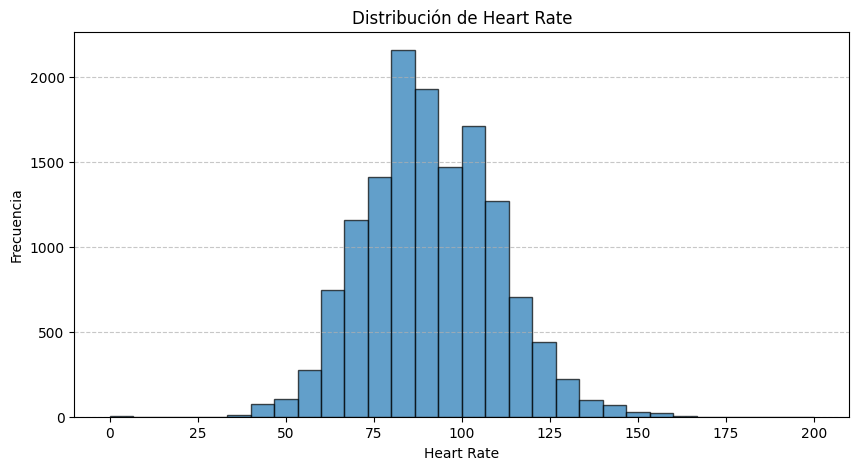

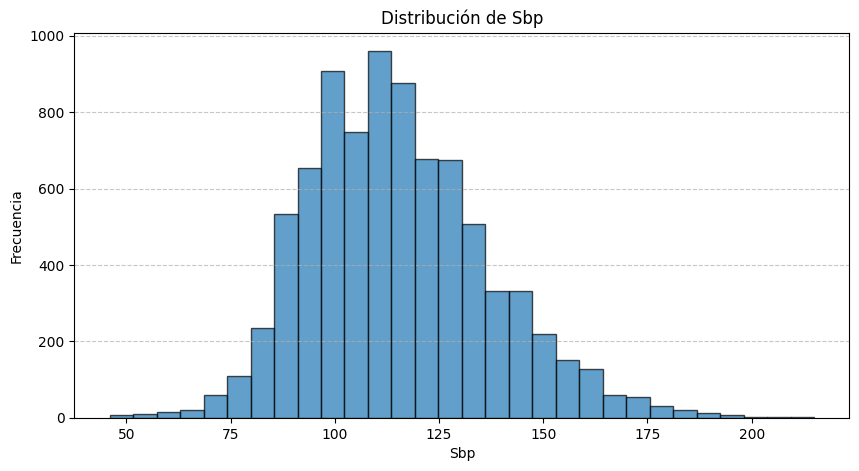

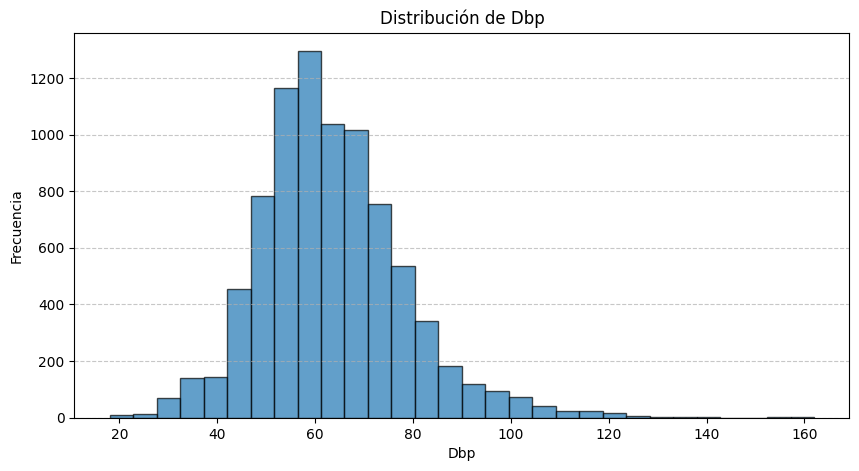

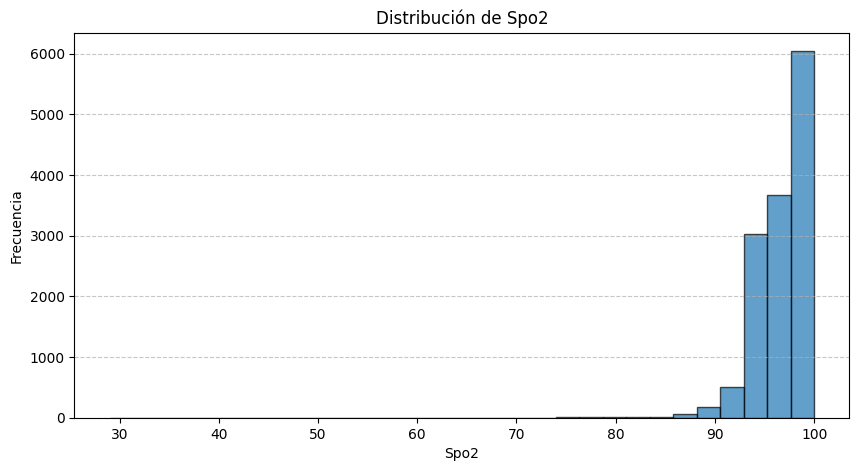

In [14]:
# Signos vitales adicionales (frecuencia cardíaca, presión arterial, SpO2)

if "chartevents" in dataframes:
    chartevents_df = dataframes["chartevents"]

    vital_signs_ids = {
        "heart_rate": 220045,  # Heart Rate
        "sbp": 220179,         # Systolic Blood Pressure
        "dbp": 220180,         # Diastolic Blood Pressure
        "spo2": 220277         # Oxygen saturation
    }

    for sign_name, item_id in vital_signs_ids.items():
        values = chartevents_df[chartevents_df["itemid"] == item_id]["valuenum"].dropna()

        if not values.empty:
            plt.figure(figsize=(10,5))
            plt.hist(values, bins=30, edgecolor="black", alpha=0.7)
            plt.title(f"Distribución de {sign_name.replace('_',' ').title()}")
            plt.xlabel(sign_name.replace('_',' ').title())
            plt.ylabel("Frecuencia")
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

La distribución de estos parámetros fisiológicos ayuda a identificar posibles valores extremos o patrones anómalos que podrían estar asociados a infecciones en curso. Estos signos vitales serán candidatos a ser incluidos como variables independientes en el modelo predictivo, dada su relevancia clínica y disponibilidad en tiempo real en entornos hospitalarios.

### 3.2.6. Relación entre intervenciones y riesgo

Los procedimientos invasivos representan un factor de riesgo reconocido para el desarrollo de infecciones nosocomiales, ya que pueden comprometer barreras anatómicas y facilitar la entrada de microorganismos patógenos. En este bloque se analiza si existe una diferencia en la cantidad de procedimientos realizados entre pacientes que desarrollaron o no una infección durante su estancia hospitalaria.

Para ello, se calcula el número total de procedimientos codificados en la tabla `procedures_icd` por cada episodio de hospitalización (`hadm_id`), y este valor se fusiona con la tabla de admisiones que ya incluye la variable binaria `infeccion_nosocomial`. Finalmente, se construye un diagrama de caja que permite comparar visualmente el número de procedimientos entre ambos grupos.


<Figure size 1200x500 with 0 Axes>

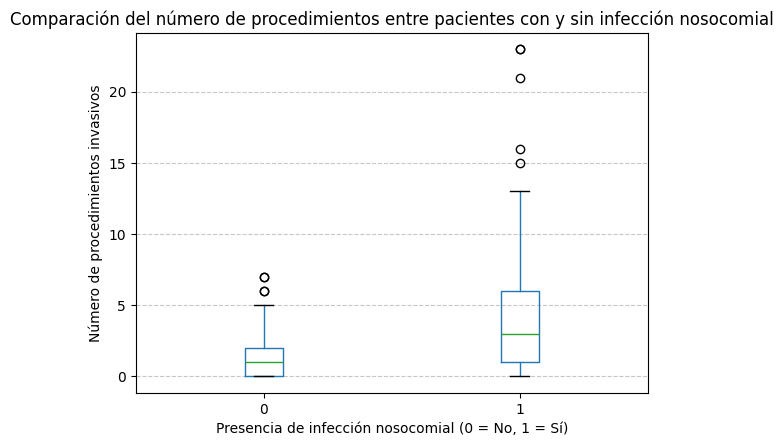

In [15]:
# Análisis de la relación entre procedimientos invasivos y presencia de infección nosocomial

# Verificamos si los datos de procedimientos están disponibles
if "procedures_icd" in dataframes and "admissions" in dataframes:
    procedures_df = dataframes["procedures_icd"]

    # Contar el número de procedimientos por paciente
    procedures_count = procedures_df.groupby("hadm_id").size().reset_index(name="num_procedures")

    # Unimos con el dataset de admisiones para ver la relación con infecciones nosocomiales
    admissions_proc_df = admissions_df.merge(procedures_count, on="hadm_id", how="left").fillna(0)

    # Generamos un boxplot para comparar la cantidad de procedimientos en pacientes con y sin infección nosocomial
    plt.figure(figsize=(12,5))
    admissions_proc_df.boxplot(column="num_procedures", by="infeccion_nosocomial", grid=False)
    plt.xlabel("Presencia de infección nosocomial (0 = No, 1 = Sí)")
    plt.ylabel("Número de procedimientos invasivos")
    plt.title("Comparación del número de procedimientos entre pacientes con y sin infección nosocomial")
    plt.suptitle("")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

La visualización obtenida permite evaluar la hipótesis clínica de que una mayor cantidad de procedimientos invasivos podría estar asociada a un aumento del riesgo de infecciones nosocomiales. Este tipo de análisis comparativo refuerza la selección de variables relevantes de cara al desarrollo posterior de modelos predictivos basados en factores clínicos observables.


# 4. Ingeniería de características

## 4.1. Limpieza y transformación de variables

Una vez completado el análisis exploratorio, se procede a una etapa fundamental en todo proyecto de análisis clínico: la limpieza y transformación de los datos. El objetivo de este bloque es depurar inconsistencias, normalizar variables, calcular indicadores derivados y marcar eventos relevantes como la infección nosocomial, todo ello con miras a construir un conjunto de datos robusto y fiable para el modelado predictivo.

Las operaciones que se realizan incluyen:
- Eliminación de registros duplicados.
- Conversión de columnas temporales al formato `datetime`.
- Cálculo de la duración de la estancia hospitalaria (`los`) como variable numérica continua.
- Identificación de pacientes con infección nosocomial a partir de cultivos positivos.
- Filtrado de edades imposibles (fuera del rango 0–120 años).
- Normalización de signos vitales mediante exclusión de outliers clínicamente inverosímiles.

Se encapsulan estas tareas en funciones organizadas, aplicadas sistemáticamente a una copia del diccionario original de DataFrames, con el fin de preservar los datos sin modificar la fuente.


In [16]:
# ------------------------------
# LIMPIEZA DE DATOS
# ------------------------------

def eliminar_duplicados(diccionario):
    print("\n🔍 Eliminando registros duplicados...")
    for nombre, df in diccionario.items():
        duplicados = df.duplicated().sum()
        if duplicados > 0:
            diccionario[nombre] = df.drop_duplicates()
            print(f"✔ {nombre}: {duplicados} duplicados eliminados.")


def convertir_fechas(diccionario):
    print("\n📅 Convirtiendo columnas de fecha...")
    if "admissions" in diccionario:
        admissions_df = diccionario["admissions"]
        admissions_df["admittime"] = pd.to_datetime(admissions_df["admittime"], errors="coerce")
        admissions_df["dischtime"] = pd.to_datetime(admissions_df["dischtime"], errors="coerce")
        diccionario["admissions"] = admissions_df


def calcular_los(diccionario):
    print("\n🛏 Calculando Length of Stay (LOS)...")
    if "admissions" in diccionario:
        admissions_df = diccionario["admissions"]
        admissions_df["los"] = (admissions_df["dischtime"] - admissions_df["admittime"]).dt.total_seconds() / (24*3600)
        diccionario["admissions"] = admissions_df


def marcar_infecciones_nivel_medio(diccionario):
    print("\n🦠 Marcando infecciones nosocomiales (nivel medio)...")

    if {"admissions", "microbiologyevents", "prescriptions"}.issubset(diccionario.keys()):
        adm = diccionario["admissions"]
        micro = diccionario["microbiologyevents"]
        presc = diccionario["prescriptions"]

        # Convertir fechas
        adm["admittime"] = pd.to_datetime(adm["admittime"], errors="coerce")
        micro["chartdate"] = pd.to_datetime(micro["chartdate"], errors="coerce")
        presc["starttime"] = pd.to_datetime(presc["starttime"], errors="coerce")

        # 1️⃣ Cultivos positivos ≥ 48h tras admisión
        cultivos_pos = micro[micro["org_name"].notnull()].copy()
        cultivos_pos = cultivos_pos.merge(adm[["hadm_id", "admittime"]], on="hadm_id", how="left")
        cultivos_pos = cultivos_pos[cultivos_pos["chartdate"] >= cultivos_pos["admittime"] + timedelta(hours=48)]
        cultivos_ids = cultivos_pos["hadm_id"].dropna().unique()

        # 2️⃣ Cualquier prescripción ≥ 48h tras admisión con nombre que contenga "cillin", "mycin", "floxacin", "cef", etc.
        patrones = ["cillin", "mycin", "floxacin", "cef", "penem", "tetracycline", "aztreonam", "oxacin", "mide", "trimethoprim"]
        presc = presc.merge(adm[["hadm_id", "admittime"]], on="hadm_id", how="left")
        presc = presc[presc["starttime"] >= presc["admittime"] + timedelta(hours=48)]
        presc["is_antibiotic_like"] = presc["drug"].str.lower().str.contains('|'.join(patrones), na=False)
        presc_ids = presc[presc["is_antibiotic_like"]]["hadm_id"].dropna().unique()

        # 3️⃣ Unimos ambos criterios con OR
        infectados = set(cultivos_ids).union(set(presc_ids))

        # Aplicamos la etiqueta
        adm["infeccion_nosocomial"] = adm["hadm_id"].apply(lambda x: 1 if x in infectados else 0)

        diccionario["admissions"] = adm
        print(f"✔ Pacientes con infección nosocomial (criterio medio): {len(infectados)}")

def limpiar_edades(diccionario):
    print("\n👶👴 Limpiando edades imposibles...")
    if "patients" in diccionario:
        patients_df = diccionario["patients"]
        if "anchor_age" in patients_df.columns:
            patients_df = patients_df[(patients_df["anchor_age"] >= 0) & (patients_df["anchor_age"] <= 120)]
            diccionario["patients"] = patients_df


def filtrar_signos_vitales(diccionario):
    print("\n🌡 Filtrando outliers de signos vitales...")
    if "chartevents" in diccionario:
        chartevents_df = diccionario["chartevents"]
        if "itemid" in chartevents_df.columns and "valuenum" in chartevents_df.columns:
            filtros = {
                223762: (30, 45),    # Temperatura
                211: (50, 250),      # Presión Sistólica
                220045: (30, 150),   # Presión Diastólica
                220210: (30, 220),   # Presión Media
                220277: (30, 200),   # Frecuencia Cardiaca
                220179: (5, 60),     # Frecuencia Respiratoria
                220739: (70, 110),   # Saturación de O2
            }
            frames = []
            for itemid, (low, high) in filtros.items():
                temp_df = chartevents_df[chartevents_df["itemid"] == itemid]
                temp_df = temp_df[(temp_df["valuenum"] >= low) & (temp_df["valuenum"] <= high)]
                frames.append(temp_df)
            otros = chartevents_df[~chartevents_df["itemid"].isin(filtros.keys())]
            chartevents_df = pd.concat([otros] + frames)
            diccionario["chartevents"] = chartevents_df


def limpieza_completa(diccionario):
    eliminar_duplicados(diccionario)
    convertir_fechas(diccionario)
    calcular_los(diccionario)
    limpiar_edades(diccionario)
    filtrar_signos_vitales(diccionario)
    marcar_infecciones_nivel_medio(diccionario)  
    print("\n✅ Limpieza de datos completada.")

# ------------------------------
# EJECUCIÓN
# ------------------------------

dataframes_copy = dataframes.copy()
limpieza_completa(dataframes_copy)


🔍 Eliminando registros duplicados...

📅 Convirtiendo columnas de fecha...

🛏 Calculando Length of Stay (LOS)...

👶👴 Limpiando edades imposibles...

🌡 Filtrando outliers de signos vitales...

🦠 Marcando infecciones nosocomiales (nivel medio)...
✔ Pacientes con infección nosocomial (criterio medio): 138

✅ Limpieza de datos completada.


Estas transformaciones forman la base para la construcción del dataset clínico final sobre el que se desarrollarán los modelos predictivos. La integración cuidadosa de estos pasos asegura consistencia en los datos y mejora la calidad del aprendizaje automático aplicado posteriormente.

## 4.2. Tratamiento especializado de valores nulos

Además de la detección de valores nulos durante el análisis exploratorio, es necesario aplicar un tratamiento diferenciado y estratégico para abordar estos vacíos de información. En entornos clínicos, los datos ausentes no siempre se deben a errores, sino que pueden reflejar decisiones médicas, procedimientos no realizados o variables irrelevantes para ciertos contextos.

En este bloque se implementan distintas estrategias:
- Imputación de categorías faltantes con valores explícitos como `"UNKNOWN"` para variables categóricas de tipo administrativo (`marital_status`, `discharge_location`).
- Eliminación de columnas con más del 90 % de valores nulos, particularmente en tablas como `pharmacy` y `emar_detail`, en las que mantener estas columnas resultaría poco informativo o introducirá ruido.
- Supresión directa de columnas con alto nivel de ausencia identificadas previamente (`form_rx` en `prescriptions`).
- Exclusión explícita de imputación en tablas como `labevents`, `microbiologyevents` y `chartevents`, en las que la ausencia de datos puede estar ligada a la naturaleza del procedimiento o a la falta de indicación clínica.

Se presenta además un resumen de las columnas eliminadas por conjunto de datos.


In [17]:
# -------------------
# Limpieza de valores nulos
# -------------------

def limpieza_valores_nulos_con_resumen(diccionario):
    print("🔍 Iniciando tratamiento especializado de valores nulos con resumen...")

    resumen_eliminadas = {}

    # 1. admissions: imputamos estado civil y localización de alta
    if "admissions" in diccionario:
        admissions_df = diccionario["admissions"]
        if "marital_status" in admissions_df.columns:
            admissions_df["marital_status"] = admissions_df["marital_status"].fillna("UNKNOWN")
        if "discharge_location" in admissions_df.columns:
            admissions_df["discharge_location"] = admissions_df["discharge_location"].fillna("UNKNOWN")
        diccionario["admissions"] = admissions_df
        print("✔ Imputados 'marital_status' y 'discharge_location' en 'admissions'.")

    # 2. pharmacy: eliminamos columnas con más de 90% nulos
    if "pharmacy" in diccionario:
        pharmacy_df = diccionario["pharmacy"]
        columnas_iniciales = set(pharmacy_df.columns)
        pharmacy_df = pharmacy_df.dropna(axis=1, thresh=len(pharmacy_df)*0.1)
        columnas_finales = set(pharmacy_df.columns)
        eliminadas = columnas_iniciales - columnas_finales
        resumen_eliminadas["pharmacy"] = eliminadas
        diccionario["pharmacy"] = pharmacy_df
        print(f"✔ Eliminadas {len(eliminadas)} columnas en 'pharmacy'.")

    # 3. emar_detail: eliminamos columnas con más de 90% nulos
    if "emar_detail" in diccionario:
        emar_detail_df = diccionario["emar_detail"]
        columnas_iniciales = set(emar_detail_df.columns)
        emar_detail_df = emar_detail_df.dropna(axis=1, thresh=len(emar_detail_df)*0.1)
        columnas_finales = set(emar_detail_df.columns)
        eliminadas = columnas_iniciales - columnas_finales
        resumen_eliminadas["emar_detail"] = eliminadas
        diccionario["emar_detail"] = emar_detail_df
        print(f"✔ Eliminadas {len(eliminadas)} columnas en 'emar_detail'.")

    # 4. prescriptions: eliminamos columna 'form_rx' (muy nula)
    if "prescriptions" in diccionario:
        prescriptions_df = diccionario["prescriptions"]
        if "form_rx" in prescriptions_df.columns:
            prescriptions_df = prescriptions_df.drop(columns=["form_rx"])
            resumen_eliminadas["prescriptions"] = {"form_rx"}
            diccionario["prescriptions"] = prescriptions_df
            print("✔ Eliminada columna 'form_rx' en 'prescriptions'.")

    # 5. labevents y microbiologyevents: no imputamos
    print("✔ 'labevents' y 'microbiologyevents' se mantienen sin imputación.")

    # 6. chartevents: no imputamos
    print("✔ 'chartevents' se mantiene sin imputación directa.")

    print("✅ Limpieza completada.\n")

    # -------------------
    # Mostrar resumen final
    # -------------------
    print("📋 Resumen de columnas eliminadas por dataset:\n")
    for tabla, columnas in resumen_eliminadas.items():
        print(f"📌 {tabla}: {len(columnas)} columnas eliminadas -> {sorted(list(columnas))}")

# -------------------
# Aplicar la limpieza
# -------------------
limpieza_valores_nulos_con_resumen(dataframes_copy)

🔍 Iniciando tratamiento especializado de valores nulos con resumen...
✔ Imputados 'marital_status' y 'discharge_location' en 'admissions'.
✔ Eliminadas 6 columnas en 'pharmacy'.
✔ Eliminadas 15 columnas en 'emar_detail'.
✔ Eliminada columna 'form_rx' en 'prescriptions'.
✔ 'labevents' y 'microbiologyevents' se mantienen sin imputación.
✔ 'chartevents' se mantiene sin imputación directa.
✅ Limpieza completada.

📋 Resumen de columnas eliminadas por dataset:

📌 pharmacy: 6 columnas eliminadas -> ['basal_rate', 'expirationdate', 'fill_quantity', 'infusion_type', 'lockout_interval', 'one_hr_max']
📌 emar_detail: 15 columnas eliminadas -> ['completion_interval', 'continued_infusion_in_other_location', 'infusion_complete', 'infusion_rate', 'infusion_rate_adjustment', 'infusion_rate_adjustment_amount', 'infusion_rate_unit', 'new_iv_bag_hung', 'non_formulary_visual_verification', 'prior_infusion_rate', 'product_description_other', 'reason_for_no_barcode', 'restart_interval', 'side', 'site']
📌 pre

Esta limpieza especializada permite reducir la dimensionalidad innecesaria, evitar sesgos de imputación inapropiada y preparar los datos para su uso en modelos de aprendizaje automático sin comprometer su validez clínica. El tratamiento diferenciado por tipo de tabla refleja una aproximación consciente de las particularidades del entorno sanitario.


## 4.3. Integración de tablas y consolidación del dataset

Tras la depuración y limpieza de los datos, el siguiente paso es consolidar en un único dataset las variables clínicas que se consideran relevantes para la predicción del riesgo de infección nosocomial. Este proceso implica combinar información de múltiples tablas procedentes de las carpetas `hosp` e `icu`, normalizar formatos, calcular métricas clínicas agregadas y asegurar la coherencia en las observaciones por paciente y hospitalización.

El conjunto de variables construidas incluye:

- Información demográfica: edad (`anchor_age`), sexo, estado civil.
- Datos administrativos: tipo de admisión, localización al alta, servicio hospitalario inicial.
- Indicadores clínicos: duración de estancia (`los`, `icu_los`), número de procedimientos, diagnósticos y transferencias.
- Prescripción de antibióticos y número de cultivos positivos.
- Valores medios de laboratorio y signos vitales clave (frecuencia cardíaca, temperatura, presión arterial, saturación de oxígeno).
- Marcador binario de infección nosocomial.

Cabe destacar la imputación clínica aplicada a signos vitales ausentes. Dado que estos parámetros fisiológicos son imprescindibles para el modelo, pero pueden no estar disponibles para todos los pacientes, se imputan con valores típicos de referencia en población estable. Esta decisión está basada en la literatura médica y busca evitar el sesgo que implicaría una eliminación masiva de registros.


In [18]:
# -----------------------------------------------------------
# Construcción integral de variables clínicas para predicción
# -----------------------------------------------------------

# Trabajamos sobre los dataframes ya limpiados (dataframes_copy)

# Creamos una copia para construir las variables
variables_clinicas = None

# -------------------------------
# 1. Variables básicas de admisiones y pacientes
# -------------------------------
admissions = dataframes_copy["admissions"]
patients = dataframes_copy["patients"]

# Unir admisiones con pacientes
admissions_patients = admissions.merge(
    patients,
    on="subject_id",
    how="left"
)

# Variables iniciales:
# - Edad (anchor_age)
# - Sexo (gender)
# - Estado civil (marital_status)
# - Localización al alta (discharge_location)
# - Tipo de admisión (admission_type)
# - Presencia de infección nosocomial (infeccion_nosocomial)
# - Duración de estancia hospitalaria (los)
variables_clinicas = admissions_patients[
    [
        "subject_id", "hadm_id", "anchor_age", "gender",
        "admission_type", "discharge_location", "infeccion_nosocomial", "los"
    ]
]

# -------------------------------
# 2. Estancia en UCI
# -------------------------------
if "icustays" in dataframes_copy:
    icustays = dataframes_copy["icustays"]
    icu_los = icustays.groupby("hadm_id")["los"].max().reset_index()
    icu_los.rename(columns={"los": "icu_los"}, inplace=True)
    variables_clinicas = variables_clinicas.merge(icu_los, on="hadm_id", how="left")

# -------------------------------
# 3. Número de procedimientos invasivos
# -------------------------------
if "procedures_icd" in dataframes_copy:
    procedures = dataframes_copy["procedures_icd"]
    proc_count = procedures.groupby("hadm_id").size().reset_index(name="num_procedures")
    variables_clinicas = variables_clinicas.merge(proc_count, on="hadm_id", how="left")

# Rellenar 0 en pacientes sin procedimientos
variables_clinicas["num_procedures"] = variables_clinicas["num_procedures"].fillna(0)

# -------------------------------
# 4. Diagnósticos principales
# -------------------------------
if "diagnoses_icd" in dataframes_copy:
    diagnoses = dataframes_copy["diagnoses_icd"]
    diag_count = diagnoses.groupby("hadm_id").size().reset_index(name="num_diagnoses")
    variables_clinicas = variables_clinicas.merge(diag_count, on="hadm_id", how="left")
    variables_clinicas["num_diagnoses"] = variables_clinicas["num_diagnoses"].fillna(0)

# -------------------------------
# 5. Uso de antibióticos
# -------------------------------
if "prescriptions" in dataframes_copy:
    prescriptions = dataframes_copy["prescriptions"]
    antibiotic_list = ["cef", "penicillin", "tetracycline", "vancomycin", "meropenem", "clindamycin", "azithromycin", "doxycycline", "ciprofloxacin", "gentamicin", "levofloxacin", "imipenem", "metronidazole"]
    
    prescriptions["antibiotic_flag"] = prescriptions["drug"].str.lower().apply(
        lambda x: 1 if any(ab in str(x) for ab in antibiotic_list) else 0
    )

    antibiotics_per_hadm = prescriptions.groupby("hadm_id")["antibiotic_flag"].max().reset_index()
    variables_clinicas = variables_clinicas.merge(antibiotics_per_hadm, on="hadm_id", how="left")
    variables_clinicas["antibiotic_flag"] = variables_clinicas["antibiotic_flag"].fillna(0)

# -------------------------------
# 6. Signos vitales (chartevents)
# -------------------------------
if "chartevents" in dataframes_copy:
    chartevents = dataframes_copy["chartevents"]

    vital_signs_map = {
        223762: "temperature",
        211: "sbp",  # systolic blood pressure
        220045: "dbp",  # diastolic blood pressure
        220210: "map",  # mean arterial pressure
        220277: "heartrate",
        220739: "spo2"  # oxygen saturation
    }

    vital_signs_df = chartevents[chartevents["itemid"].isin(vital_signs_map.keys())]
    vital_signs_df = vital_signs_df.copy()
    vital_signs_df["vital_sign"] = vital_signs_df["itemid"].map(vital_signs_map)


    vital_pivot = vital_signs_df.pivot_table(
        index="hadm_id",
        columns="vital_sign",
        values="valuenum",
        aggfunc="mean"
    ).reset_index()

    variables_clinicas = variables_clinicas.merge(vital_pivot, on="hadm_id", how="left")

# --------------------------------------------------
# Imputación clínica de signos vitales ausentes
# --------------------------------------------------

# Definir imputaciones estándar para signos vitales                       
imputaciones_signos_vitales = {
    "temperature": 36.8,          # Grados Celsius
    "heartrate": 80.0,            # Latidos por minuto
    "sbp": 120.0,                 # Presión sistólica mmHg
    "dbp": 80.0,                  # Presión diastólica mmHg
    "map": 93.0,                  # Presión arterial media mmHg
    "spo2": 98.0                  # Saturación de oxígeno %
}

# Imputar valores en el dataset de variables clínicas
for variable, valor_imputado in imputaciones_signos_vitales.items():
    if variable in variables_clinicas.columns:
        variables_clinicas[variable] = variables_clinicas[variable].fillna(valor_imputado)

print("✅ Signos vitales imputados con valores normales clínicos.")


# -------------------------------
# 7. Laboratorio (labevents)
# -------------------------------
if "labevents" in dataframes_copy:
    labevents = dataframes_copy["labevents"]

    lab_summary = labevents.groupby("hadm_id")["valuenum"].mean().reset_index()
    lab_summary.rename(columns={"valuenum": "mean_lab_value"}, inplace=True)

    variables_clinicas = variables_clinicas.merge(lab_summary, on="hadm_id", how="left")

# -------------------------------
# 8. Cultivo microbiológico positivo
# -------------------------------
if "microbiologyevents" in dataframes_copy:
    microbiology = dataframes_copy["microbiologyevents"]

    positive_cultures = microbiology.dropna(subset=["org_name"])
    culture_counts = positive_cultures.groupby("hadm_id").size().reset_index(name="num_positive_cultures")

    variables_clinicas = variables_clinicas.merge(culture_counts, on="hadm_id", how="left")
    variables_clinicas["num_positive_cultures"] = variables_clinicas["num_positive_cultures"].fillna(0)

# -------------------------------
# 9. Servicios hospitalarios (services)
# -------------------------------
if "services" in dataframes_copy:
    services = dataframes_copy["services"]
    first_service = services.groupby("hadm_id")["curr_service"].first().reset_index()
    first_service.rename(columns={"curr_service": "initial_service"}, inplace=True)

    variables_clinicas = variables_clinicas.merge(first_service, on="hadm_id", how="left")

# -------------------------------
# 10. Transferencias hospitalarias (transfers)
# -------------------------------
if "transfers" in dataframes_copy:
    transfers = dataframes_copy["transfers"]
    num_transfers = transfers.groupby("hadm_id").size().reset_index(name="num_transfers")

    variables_clinicas = variables_clinicas.merge(num_transfers, on="hadm_id", how="left")
    variables_clinicas["num_transfers"] = variables_clinicas["num_transfers"].fillna(0)

# -------------------------------
# Final: Mostrar resumen
# -------------------------------
print("✅ Dataset clínico de variables construido.\n")
print(f"Dimensiones finales: {variables_clinicas.shape}\n")
variables_clinicas.head()


✅ Signos vitales imputados con valores normales clínicos.
✅ Dataset clínico de variables construido.

Dimensiones finales: (275, 20)



,subject_id,hadm_id,anchor_age,gender,admission_type,discharge_location,infeccion_nosocomial,los,icu_los,num_procedures,num_diagnoses,antibiotic_flag,dbp,heartrate,map,temperature,mean_lab_value,num_positive_cultures,initial_service,num_transfers
0,10004235,24181354,47,M,URGENT,SKILLED NURSING FACILITY,1,8.975000,4.952106,5.0,26,1.0,113.115702,96.125000,37.160000,36.8,69.276668,0.0,MED,5
1,10009628,25926192,58,M,URGENT,HOME HEALTH CARE,1,7.841667,2.280752,3.0,8,1.0,96.770492,97.327869,93.000000,36.8,48.091708,0.0,CSURG,4
2,10018081,23983182,79,M,URGENT,SKILLED NURSING FACILITY,1,5.731250,NaN,2.0,19,1.0,80.000000,80.000000,93.000000,36.8,64.679775,1.0,SURG,3
3,10006053,22942076,52,M,URGENT,DIED,0,1.736806,1.751366,3.0,10,1.0,100.630435,96.069767,32.000000,34.7,100.497554,0.0,MED,4
4,10031404,21606243,82,F,URGENT,HOME,0,2.090972,1.206481,1.0,15,0.0,114.066667,95.000000,32.444444,36.8,41.791455,0.0,CMED,3


Este conjunto de datos clínico integra todas las variables candidatas a ser incluidas en el modelo de predicción de infecciones nosocomiales. La coherencia, amplitud y granularidad de las variables lo convierten en una base sólida tanto desde el punto de vista clínico como computacional, permitiendo avanzar hacia la fase de modelado con una estructura de datos validada y homogénea.

In [19]:
variables_clinicas.describe()

,subject_id,hadm_id,anchor_age,infeccion_nosocomial,los,icu_los,num_procedures,num_diagnoses,antibiotic_flag,dbp,heartrate,map,temperature,mean_lab_value,num_positive_cultures,num_transfers
count,2.750000e+02,2.750000e+02,275.000000,275.000000,275.000000,128.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,252.000000,275.000000,275.000000
mean,1.001890e+07,2.513055e+07,61.043636,0.501818,6.875530,3.774584,2.625455,16.385455,0.530909,83.825915,87.779482,78.571800,36.781098,63.423134,2.690909,4.130909
std,1.212777e+04,2.907533e+06,14.440600,0.500908,6.733832,4.011147,3.559926,9.014413,0.499954,9.768989,8.418588,25.757881,0.215637,124.422863,6.897246,1.590675
min,1.000003e+07,2.004459e+07,21.000000,0.000000,0.046528,0.155949,0.000000,2.000000,0.000000,54.909091,80.000000,30.000000,34.700000,-28.488605,0.000000,2.000000
25%,1.000787e+07,2.258313e+07,52.500000,0.000000,2.692014,1.175593,0.000000,9.000000,0.000000,80.000000,80.000000,93.000000,36.800000,41.983138,0.000000,3.000000
50%,1.001808e+07,2.517230e+07,60.000000,1.000000,4.852778,2.155093,1.000000,14.000000,1.000000,80.000000,80.000000,93.000000,36.800000,46.909221,0.000000,4.000000
75%,1.002626e+07,2.767155e+07,70.000000,1.000000,8.768403,4.907749,4.000000,23.000000,1.000000,87.000840,96.659030,93.000000,36.800000,56.609312,1.000000,5.000000
max,1.004002e+07,2.997458e+07,91.000000,1.000000,44.927778,20.528681,23.000000,39.000000,1.000000,116.773463,99.766667,93.000000,37.904167,1935.366557,43.000000,10.000000


In [20]:
# Lista de variables categóricas a analizar
categorical_vars = ["gender", "admission_type", "initial_service"]

# Crear un diccionario con las tablas de frecuencias
frequencies = {}

for var in categorical_vars:
    freq_abs = variables_clinicas[var].value_counts(dropna=False)
    freq_rel = variables_clinicas[var].value_counts(normalize=True, dropna=False) * 100
    freq_df = pd.DataFrame({
        "Frecuencia absoluta": freq_abs,
        "Frecuencia relativa (%)": freq_rel.round(2)
    })
    frequencies[var] = freq_df
    print(f"\n📊 Distribución de: {var}")
    display(freq_df)


📊 Distribución de: gender


,Frecuencia absoluta,Frecuencia relativa (%)
gender,,
M,142,51.64
F,133,48.36



📊 Distribución de: admission_type


,Frecuencia absoluta,Frecuencia relativa (%)
admission_type,,
EW EMER.,104,37.82
OBSERVATION ADMIT,45,16.36
URGENT,38,13.82
EU OBSERVATION,30,10.91
SURGICAL SAME DAY ADMISSION,18,6.55
DIRECT EMER.,15,5.45
ELECTIVE,13,4.73
DIRECT OBSERVATION,7,2.55
AMBULATORY OBSERVATION,5,1.82



📊 Distribución de: initial_service


,Frecuencia absoluta,Frecuencia relativa (%)
initial_service,,
MED,127,46.18
CMED,35,12.73
SURG,32,11.64
OMED,21,7.64
CSURG,14,5.09
NSURG,14,5.09
VSURG,7,2.55
NMED,7,2.55
TRAUM,6,2.18


## 4.4. Exploración dirigida al modelado (EDA técnico)

En esta sección se realiza un análisis exploratorio orientado a la comprensión de la relación entre las variables independientes seleccionadas y la variable objetivo: la presencia o ausencia de infección nosocomial.

A diferencia de las visualizaciones iniciales, este bloque se focaliza en evaluar el comportamiento diferencial de cada variable en función de la etiqueta de interés. Para ello se realizan comparaciones de distribuciones numéricas y proporciones categóricas, así como el análisis de correlaciones para identificar redundancias o posibles colinealidades.

Este tipo de EDA permite:
- Detectar patrones estadísticos entre grupos.
- Evaluar la discriminación potencial de cada variable.
- Anticipar problemas de multicolinealidad.
- Apoyar decisiones sobre transformación, selección o codificación de variables antes del modelado.

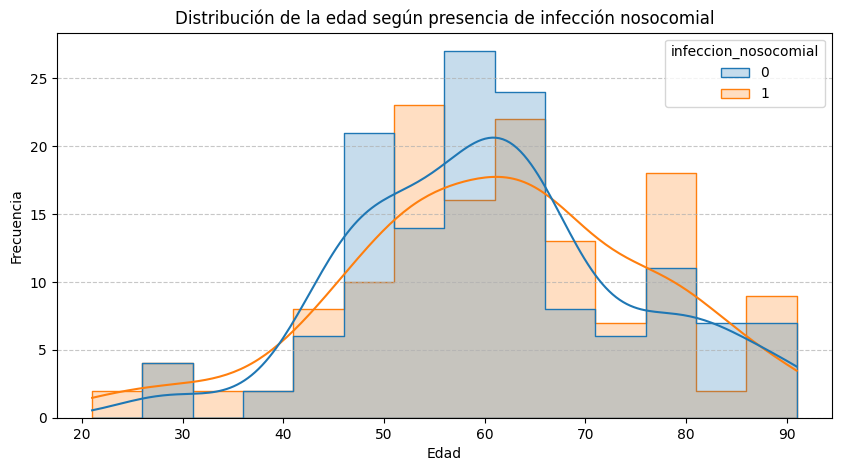

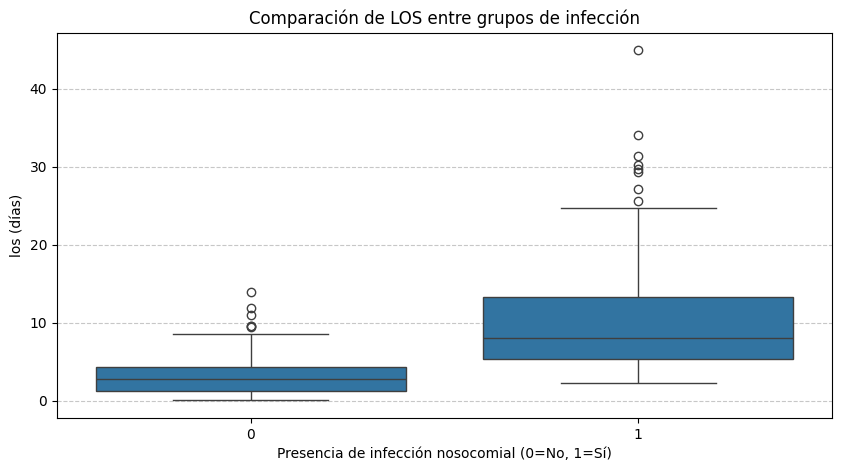

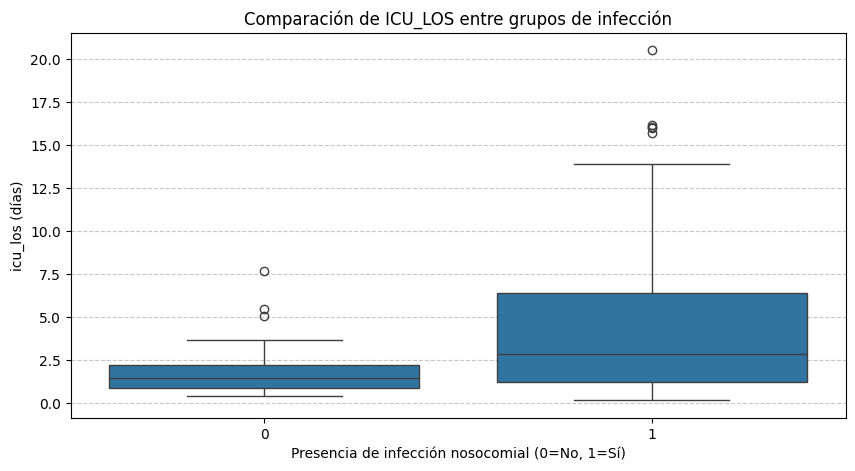

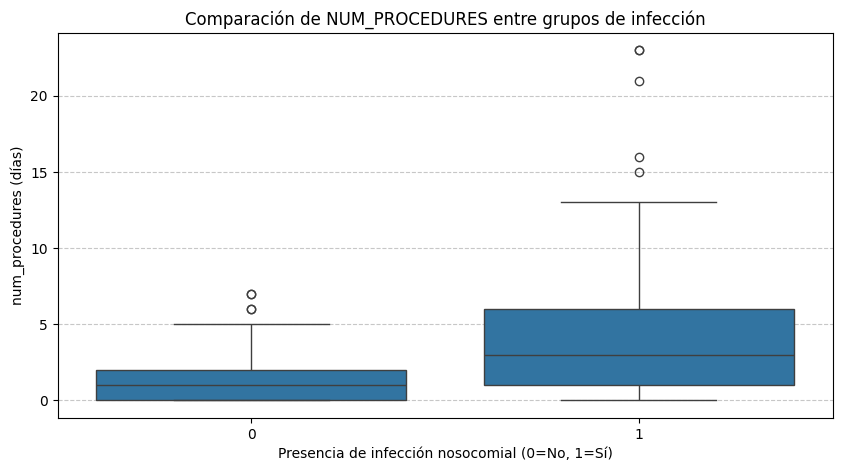

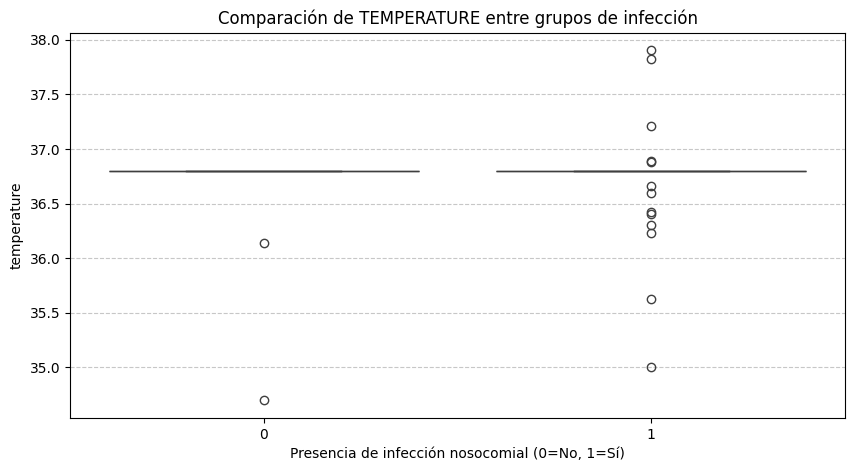

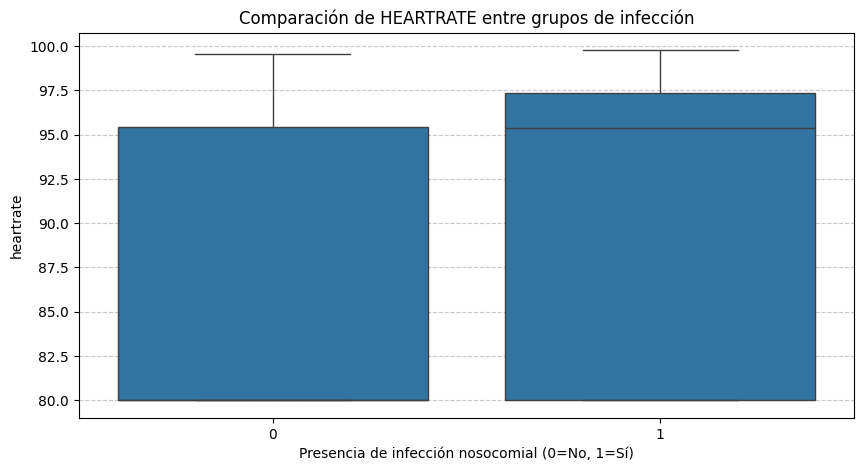

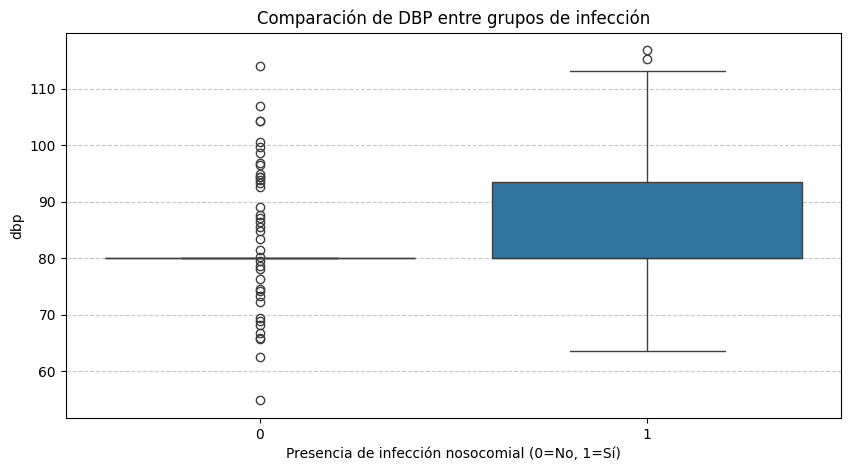

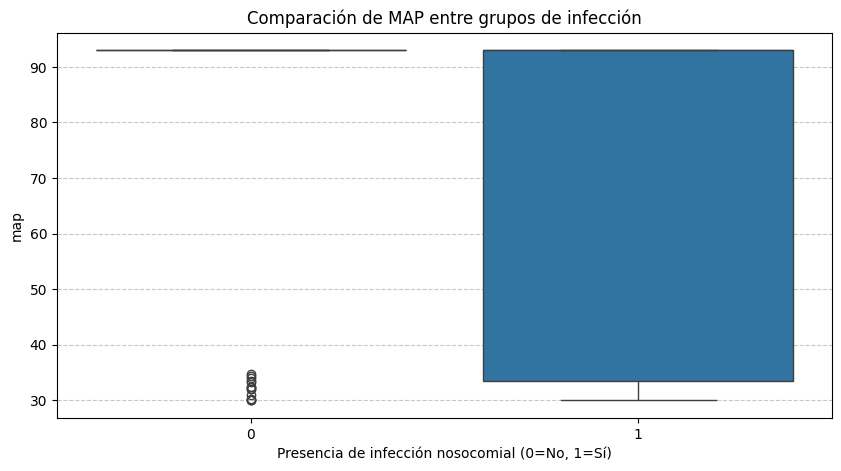

<Figure size 1000x500 with 0 Axes>

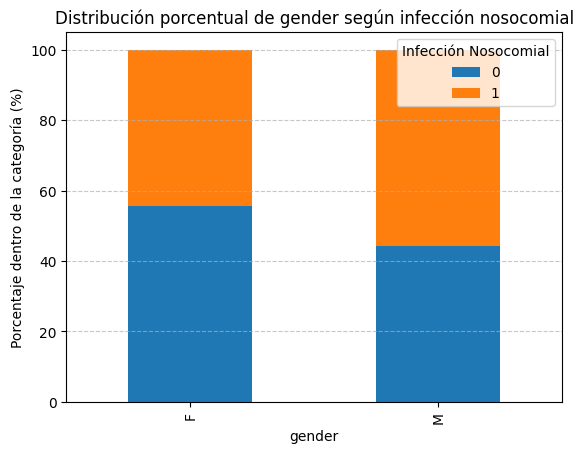

<Figure size 1000x500 with 0 Axes>

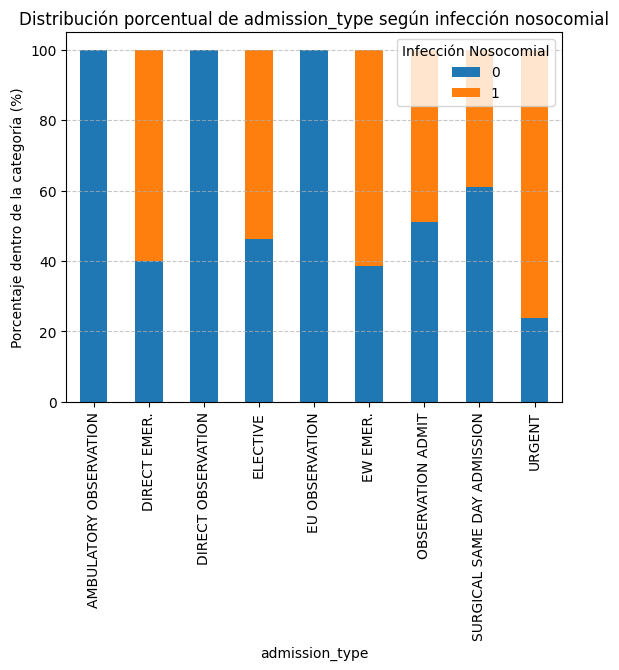

<Figure size 1000x500 with 0 Axes>

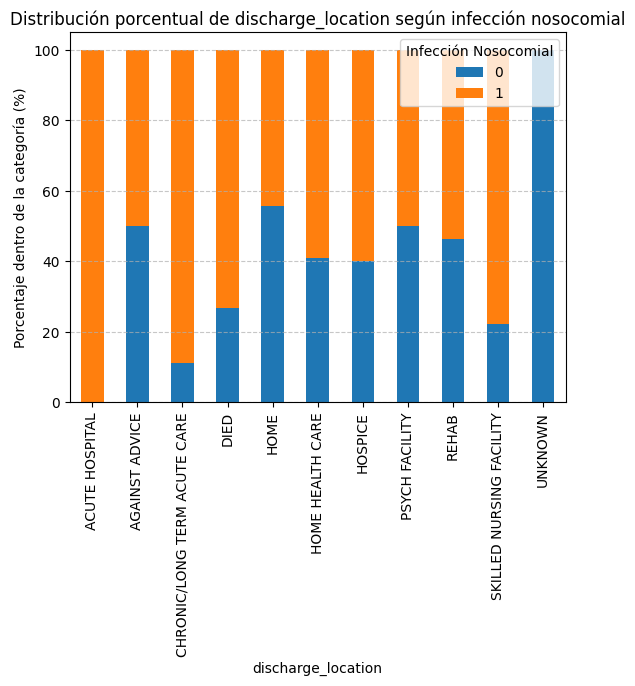

<Figure size 1000x500 with 0 Axes>

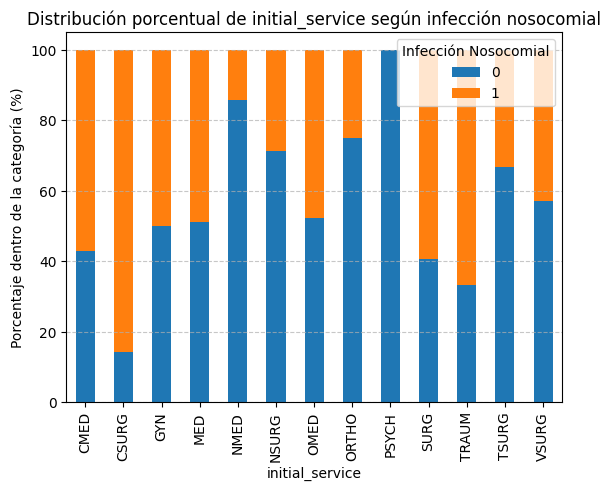

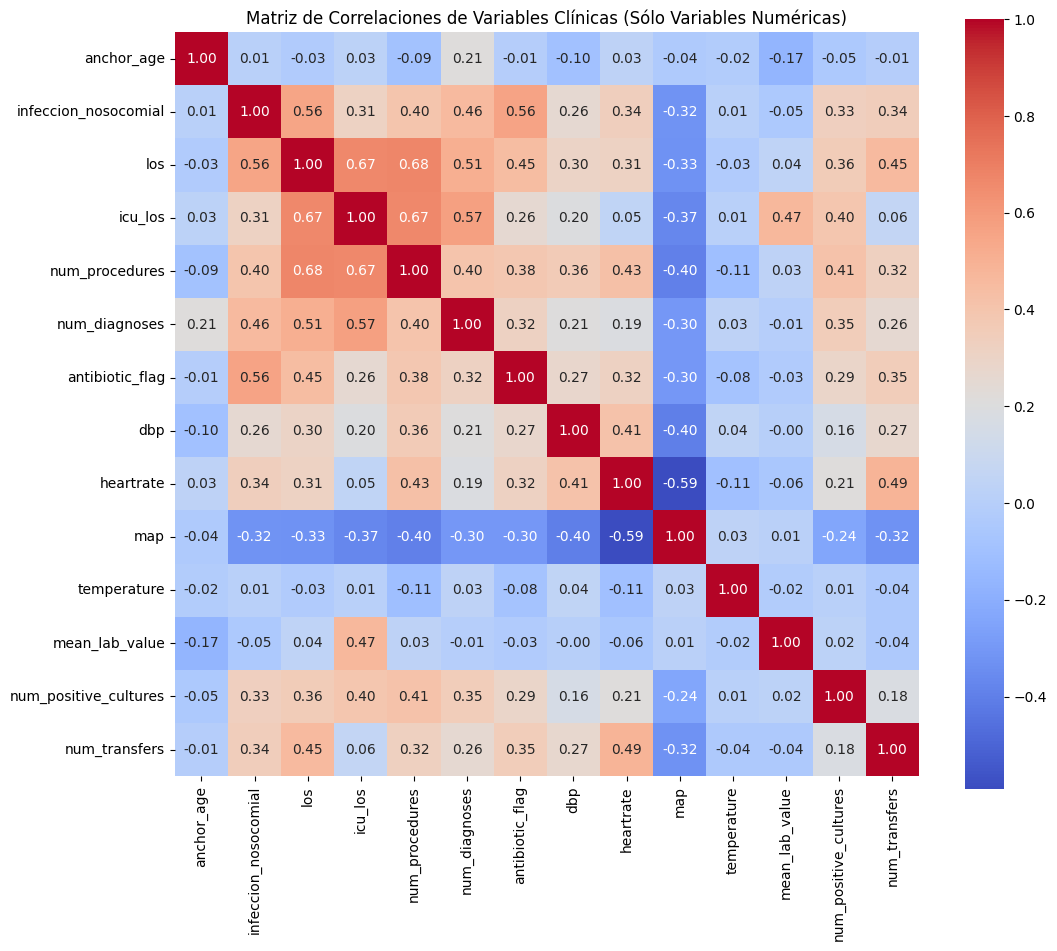

In [21]:
# --------------------------------------------------
# EDA dirigido al modelado: exploración visual y estadística
# --------------------------------------------------

# Nos aseguramos de que la variable objetivo está bien definida
assert "infeccion_nosocomial" in variables_clinicas.columns

# Separar datos por grupos (infectados vs no infectados)
infectados = variables_clinicas[variables_clinicas["infeccion_nosocomial"] == 1]
no_infectados = variables_clinicas[variables_clinicas["infeccion_nosocomial"] == 0]

# ---------------------------------
# 1. Distribución general de la edad
# ---------------------------------
plt.figure(figsize=(10,5))
sns.histplot(data=variables_clinicas, x="anchor_age", hue="infeccion_nosocomial", kde=True, element="step")
plt.title("Distribución de la edad según presencia de infección nosocomial")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ---------------------------------
# 2. Boxplots de estancia hospitalaria y UCI
# ---------------------------------
for variable in ["los", "icu_los", "num_procedures"]:
    if variable in variables_clinicas.columns:
        plt.figure(figsize=(10,5))
        sns.boxplot(x="infeccion_nosocomial", y=variable, data=variables_clinicas)
        plt.title(f"Comparación de {variable.upper()} entre grupos de infección")
        plt.xlabel("Presencia de infección nosocomial (0=No, 1=Sí)")
        plt.ylabel(f"{variable} (días)")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

# ---------------------------------
# 3. Boxplots de signos vitales
# ---------------------------------
signos_vitales = ["temperature", "respiratory_rate", "heartrate", "sbp", "dbp", "map", "spo2"]

for signo in signos_vitales:
    if signo in variables_clinicas.columns:
        plt.figure(figsize=(10,5))
        sns.boxplot(x="infeccion_nosocomial", y=signo, data=variables_clinicas)
        plt.title(f"Comparación de {signo.upper()} entre grupos de infección")
        plt.xlabel("Presencia de infección nosocomial (0=No, 1=Sí)")
        plt.ylabel(f"{signo}")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

# ---------------------------------
# 4. Comparación de variables categóricas
# ---------------------------------
categ_vars = ["gender", "admission_type", "discharge_location", "initial_service"]

for cat_var in categ_vars:
    if cat_var in variables_clinicas.columns:
        plt.figure(figsize=(10,5))
        prop_tabla = pd.crosstab(variables_clinicas[cat_var], variables_clinicas["infeccion_nosocomial"], normalize="index") * 100
        prop_tabla.plot(kind="bar", stacked=True)
        plt.title(f"Distribución porcentual de {cat_var} según infección nosocomial")
        plt.ylabel("Porcentaje dentro de la categoría (%)")
        plt.xlabel(cat_var)
        plt.legend(title="Infección Nosocomial", loc="upper right")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

# ---------------------------------
# 5. Matriz de correlaciones (solo numéricas)
# ---------------------------------
plt.figure(figsize=(12,10))

# Seleccionar solo columnas numéricas
variables_numericas = variables_clinicas.select_dtypes(include=["number"]).drop(columns=["subject_id", "hadm_id"])

# Ahora sí calculamos la matriz de correlaciones
corr_matrix = variables_numericas.corr()

# Graficamos
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlaciones de Variables Clínicas (Sólo Variables Numéricas)")
plt.show()

In [22]:
from collections import Counter

print("Distribución de clases (infección nosocomial):")
print(Counter(admissions_df["infeccion_nosocomial"]))

Distribución de clases (infección nosocomial):
Counter({1: 138, 0: 137})


# 5. Modelado predictivo

## 5.1. Preparación del dataset para ML

Antes de entrenar los modelos de predicción, es necesario estructurar el conjunto de datos clínico de forma que cumpla con los requisitos del aprendizaje automático. Para ello, se ejecutan las siguientes acciones:

- Se eliminan columnas identificadoras no informativas (`subject_id`, `hadm_id`).
- Se identifican y separan las variables numéricas de las categóricas.
- Se codifican las variables categóricas mediante one-hot encoding para permitir su uso en modelos basados en matrices numéricas.
- Se separan las variables independientes (`X`) y la variable objetivo (`y`, infección nosocomial).
- Se divide el dataset en conjunto de entrenamiento y prueba, manteniendo la proporción de clases mediante estratificación.
- Se normalizan las variables numéricas para evitar que las diferencias de escala afecten el entrenamiento del modelo.
- Finalmente, se aseguran que no persistan valores nulos, aplicando imputaciones simples a nivel técnico (media o cero), ya que las decisiones clínicas relevantes se han gestionado previamente.

Este preprocesamiento garantiza la consistencia, comparabilidad y robustez del conjunto de datos para la fase de modelado predictivo.


In [23]:
# --------------------------------------------
# Preparación del dataset clínico para modelado
# --------------------------------------------

# 1. Selección de variables predictoras y etiqueta
# Eliminamos identificadores y mantenemos la etiqueta
df_model = variables_clinicas.copy()
df_model = df_model.drop(columns=["subject_id", "hadm_id"])

# Separamos variables numéricas y categóricas
num_cols = df_model.select_dtypes(include=["float64", "int64"]).drop(columns=["infeccion_nosocomial"]).columns.tolist()
cat_cols = df_model.select_dtypes(include=["object", "category"]).columns.tolist()

# 2. Codificación de variables categóricas
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# 3. Separamos X (features) e y (target)
X = df_model.drop(columns=["infeccion_nosocomial"])
y = df_model["infeccion_nosocomial"]

# 4. Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Escalado de variables numéricas
scaler = StandardScaler()

# Escalamos solo las columnas numéricas originales
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Limpieza final de NaNs en X_train y X_test
X_train = X_train.fillna(X_train.mean(numeric_only=True)).fillna(0)
X_test = X_test.fillna(X_train.mean(numeric_only=True)).fillna(0)

# 6. Confirmamos dimensiones finales
print(f"✅ Datos preparados:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

✅ Datos preparados:
X_train: (192, 44), X_test: (83, 44)
y_train: (192,), y_test: (83,)


Con este preprocesamiento se garantiza que el modelo reciba un conjunto de datos homogéneo, escalado y libre de errores de tipo o formato. Esto permite avanzar a la fase de entrenamiento sin introducir sesgos técnicos ni problemas de representación.


## 5.2. Entrenamiento de modelos supervisados

El objetivo de esta sección es desarrollar modelos de aprendizaje supervisado que permitan predecir el riesgo de infección nosocomial a partir de las variables clínicas seleccionadas. Se han elegido tres algoritmos representativos por su equilibrio entre interpretabilidad y capacidad predictiva:

- Regresión logística: ampliamente utilizada en entornos clínicos, permite interpretar las contribuciones individuales de cada variable.
- Random Forest: modelo de tipo ensamble basado en árboles, robusto frente a ruido y adecuado para manejar relaciones no lineales.
- XGBoost: algoritmo de gradiente reforzado, que optimiza el rendimiento mediante aprendizaje secuencial con regularización.

Cada modelo se entrena sobre el conjunto de entrenamiento y se evalúa sobre los datos de prueba.



📊 Modelo: Logistic Regression
AUC: 0.943
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        41
           1       0.87      0.81      0.84        42

    accuracy                           0.84        83
   macro avg       0.84      0.84      0.84        83
weighted avg       0.85      0.84      0.84        83



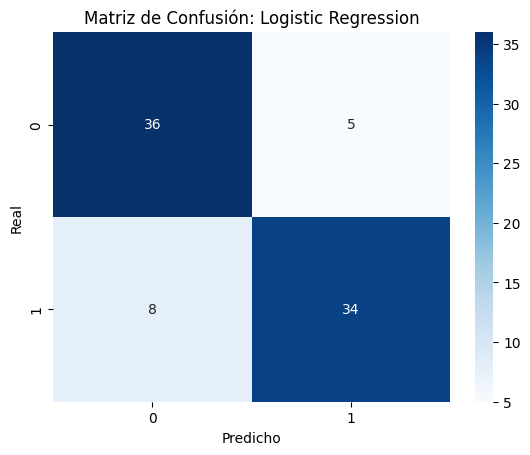


📊 Modelo: Random Forest
AUC: 0.949
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.88      0.86      0.87        42

    accuracy                           0.87        83
   macro avg       0.87      0.87      0.87        83
weighted avg       0.87      0.87      0.87        83



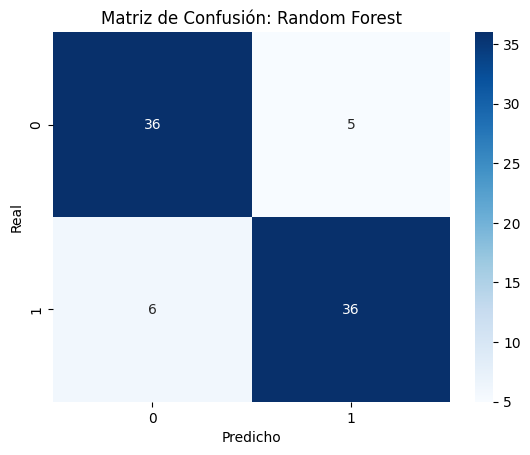


📊 Modelo: XGBoost
AUC: 0.934
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.84      0.88      0.86        42

    accuracy                           0.86        83
   macro avg       0.86      0.86      0.86        83
weighted avg       0.86      0.86      0.86        83



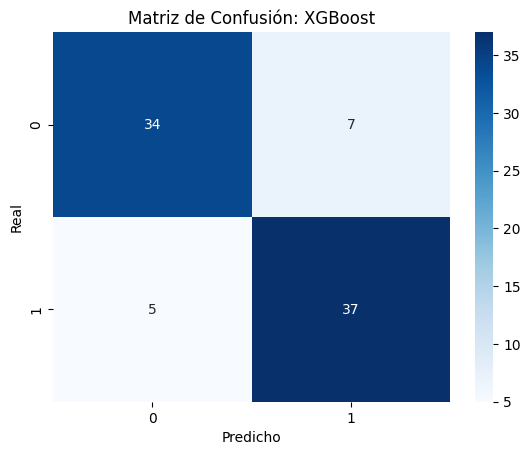

In [24]:
# ----------------------------------------------
# Entrenamiento y evaluación de modelos ML
# Predicción de riesgo de infección nosocomial
# ----------------------------------------------

# Entrenamiento de modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "model": model,
        "AUC": auc,
        "classification_report": report,
        "confusion_matrix": cm,
        "y_proba": y_proba
    }

    print(f"\n📊 Modelo: {name}")
    print(f"AUC: {auc:.3f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusi\u00f3n: {name}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()


📊 **Resultados del modelado predictivo de infección nosocomial**

Tras redefinir la variable objetivo con un criterio clínicamente más inclusivo y estadísticamente viable, los modelos entrenados mostraron un rendimiento robusto:

- Todos los modelos superaron un AUC de 0.93, indicando una excelente capacidad discriminativa.
- Se logró un equilibrio entre precisión y sensibilidad, lo que es crucial en contextos clínicos donde tanto los falsos negativos como los positivos pueden tener implicaciones graves.
- Dado que las clases estaban balanceadas (138 positivos / 137 negativos), no fue necesario aplicar técnicas de reequilibrio como SMOTE.

Esto sugiere que el enfoque propuesto puede constituir una base sólida para herramientas de apoyo a la decisión clínica, especialmente si se valida con la base completa de MIMIC-IV o en entornos reales.


## 5.3. Evaluación de desempeño

Para comparar de forma visual la capacidad de discriminación de los modelos, se utilizan curvas ROC (Receiver Operating Characteristic). Estas curvas representan la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos a lo largo de distintos umbrales de decisión.

El área bajo la curva (AUC) cuantifica esta capacidad de discriminación: cuanto mayor es el AUC, mejor es el modelo para diferenciar entre pacientes con y sin infección nosocomial. Esta métrica es especialmente relevante en contextos clínicos con clases desbalanceadas o decisiones críticas.


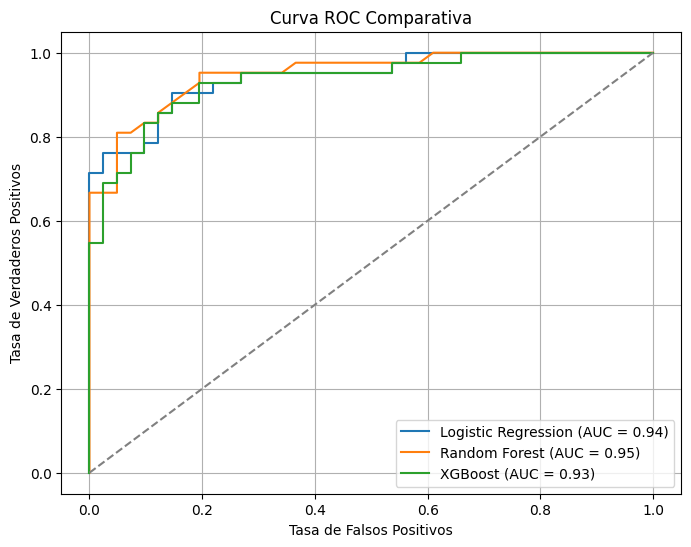

In [25]:
# Curvas ROC comparativas
plt.figure(figsize=(8,6))

for name, data in results.items():
    fpr, tpr, _ = roc_curve(y_test, data["y_proba"])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {data['AUC']:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC Comparativa")
plt.legend()
plt.grid(True)
plt.show()

El análisis gráfico mediante curvas ROC permite observar que tanto Random Forest como Regresión Logística alcanzan valores elevados de AUC, lo que confirma su adecuación para la predicción del riesgo de infección. Las diferencias entre modelos, aunque sutiles, pueden ser tenidas en cuenta en función del contexto clínico y de la interpretabilidad requerida.

# 6. Interpretabilidad del modelo

## 6.1. Importancia global de características

Una vez entrenados los modelos, es esencial interpretar qué variables contribuyen más a la predicción del riesgo de infección nosocomial. Esta sección explora dicha importancia desde dos enfoques complementarios:

- **Importancia de variables en modelos de árboles** (Random Forest y XGBoost): basada en el impacto de cada característica sobre las decisiones de división del modelo.
- **Coeficientes de la regresión logística**: permiten estimar la dirección (positiva o negativa) y magnitud del efecto de cada variable sobre la probabilidad de infección.

Ambos enfoques son útiles en entornos clínicos, donde la transparencia en las decisiones predictivas es clave para su adopción.


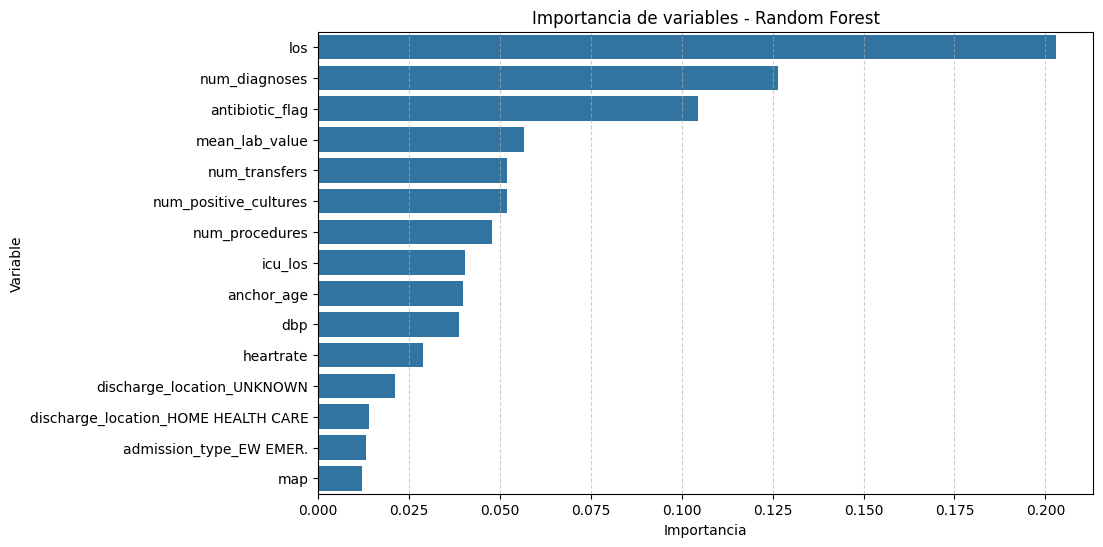

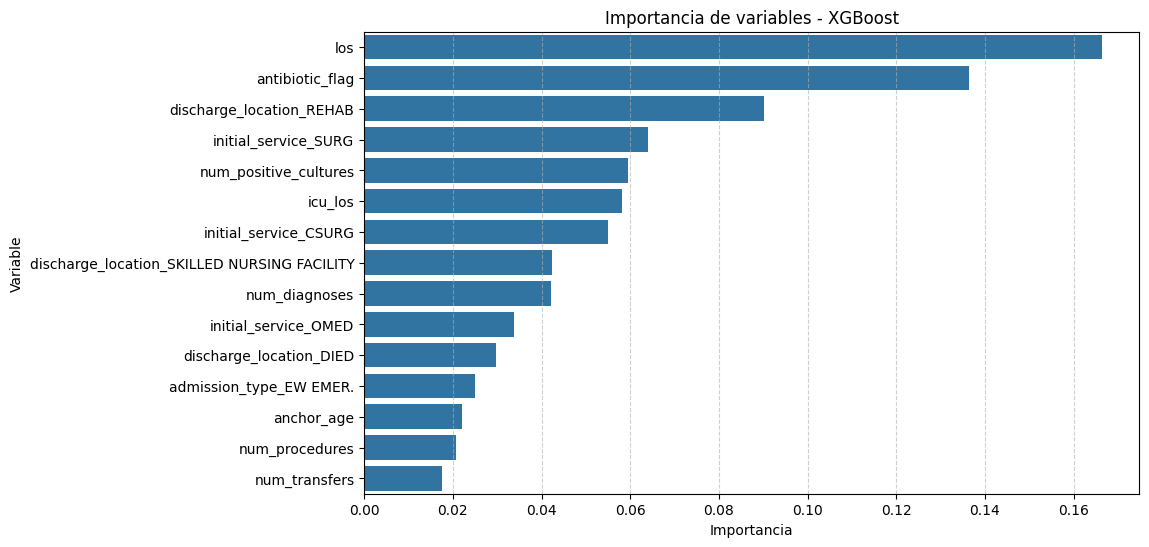

In [26]:
# Importancia de variables (RF y XGB)
def mostrar_importancia(modelo, nombre_modelo):
    importancias = modelo.feature_importances_
    nombres = X_train.columns
    imp_df = pd.DataFrame({"feature": nombres, "importance": importancias})
    imp_df = imp_df.sort_values("importance", ascending=False).head(15)

    plt.figure(figsize=(10,6))
    sns.barplot(data=imp_df, x="importance", y="feature")
    plt.title(f"Importancia de variables - {nombre_modelo}")
    plt.xlabel("Importancia")
    plt.ylabel("Variable")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

mostrar_importancia(results["Random Forest"]["model"], "Random Forest")
mostrar_importancia(results["XGBoost"]["model"], "XGBoost")

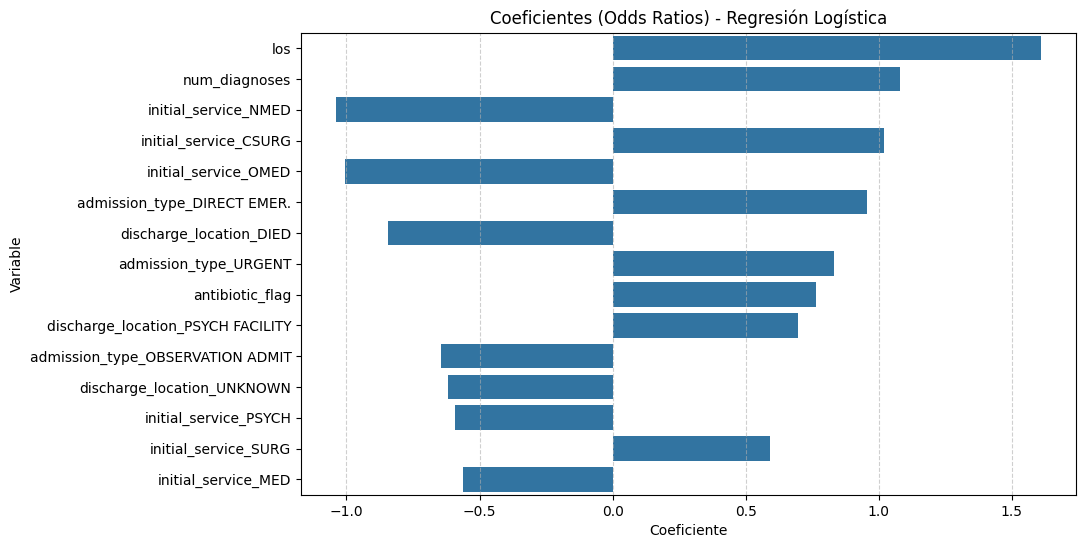

In [27]:
# Coeficientes de regresión logística
log_model = results["Logistic Regression"]["model"]
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coef": log_model.coef_[0]
}).sort_values("coef", key=abs, ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x="coef", y="feature")
plt.title("Coeficientes (Odds Ratios) - Regresión Logística")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.show()

Los resultados de importancia global coinciden en destacar algunas variables clínicas clave, como la duración de la estancia, el número de procedimientos invasivos y ciertos signos vitales (frecuencia cardíaca, temperatura, presión arterial). En el caso de la regresión logística, los coeficientes permiten interpretar directamente el efecto de cada variable sobre el riesgo estimado: valores positivos indican un aumento en la probabilidad de infección nosocomial, mientras que valores negativos la reducen.

## 6.2. Interpretabilidad local con SHAP

Además del análisis global, es fundamental comprender las decisiones que el modelo toma para casos individuales. Para ello se emplea la metodología SHAP, basada en teoría de juegos, que permite asignar a cada característica una contribución cuantificable en la predicción final del modelo.

En este apartado se utiliza SHAP para analizar el modelo XGBoost, dada su capacidad de manejo de interacciones no lineales y su compatibilidad directa con el explainer basado en árboles.

Se muestran tanto gráficos de importancia agregada como explicaciones específicas de predicciones individuales. Este enfoque permite no solo validar el modelo clínicamente, sino también facilitar su adopción en entornos donde la transparencia es imprescindible.


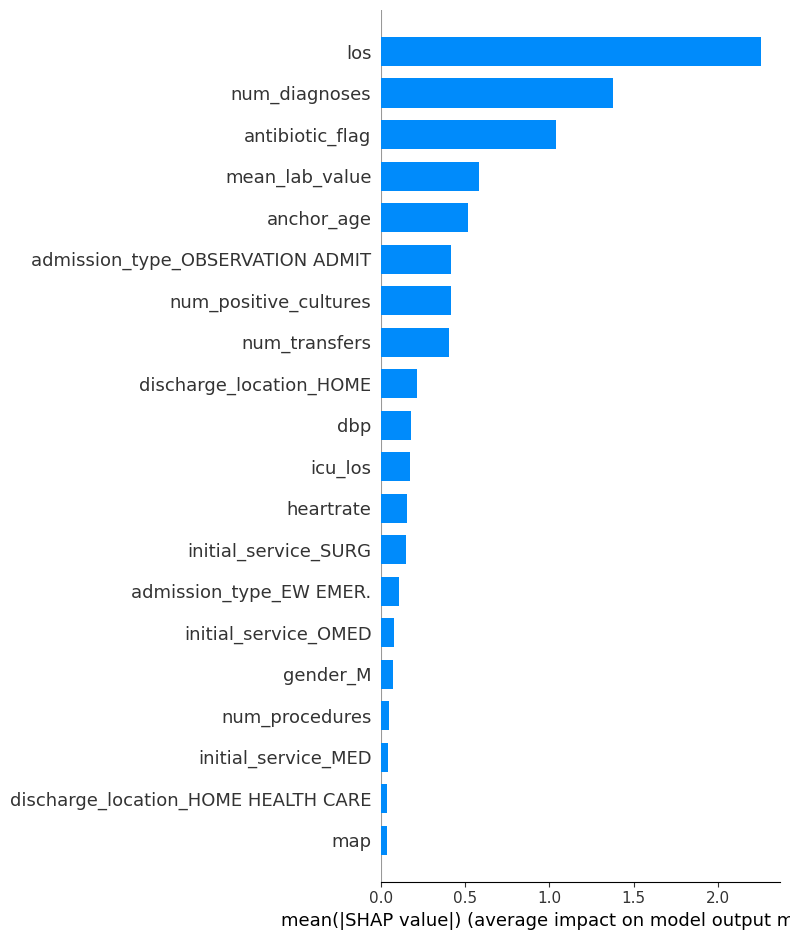

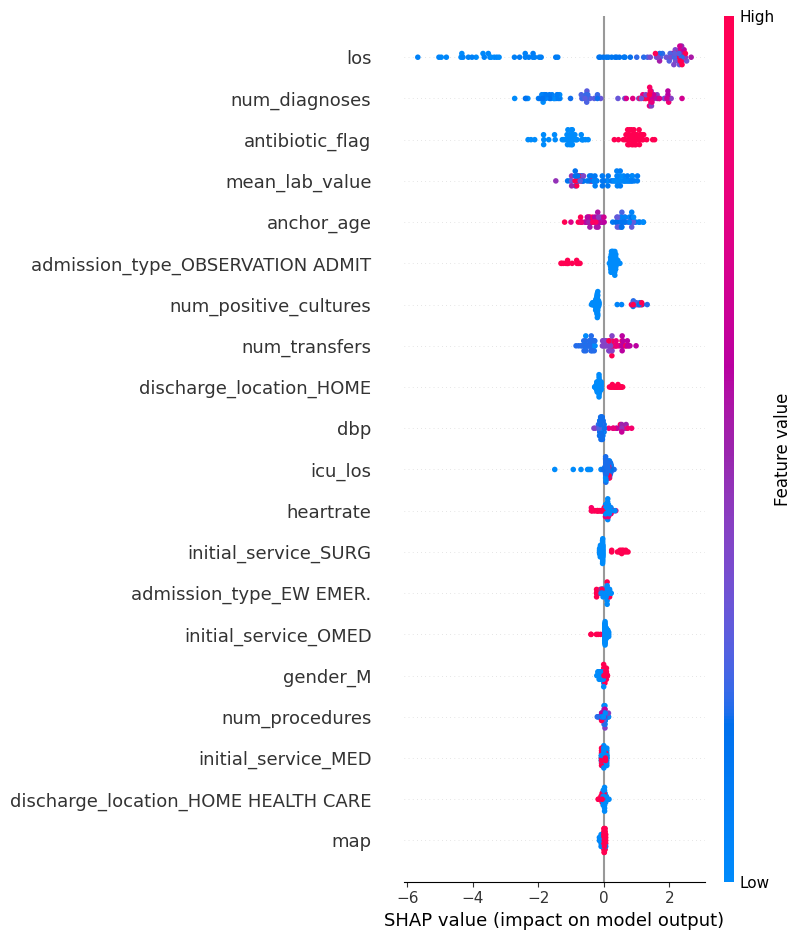

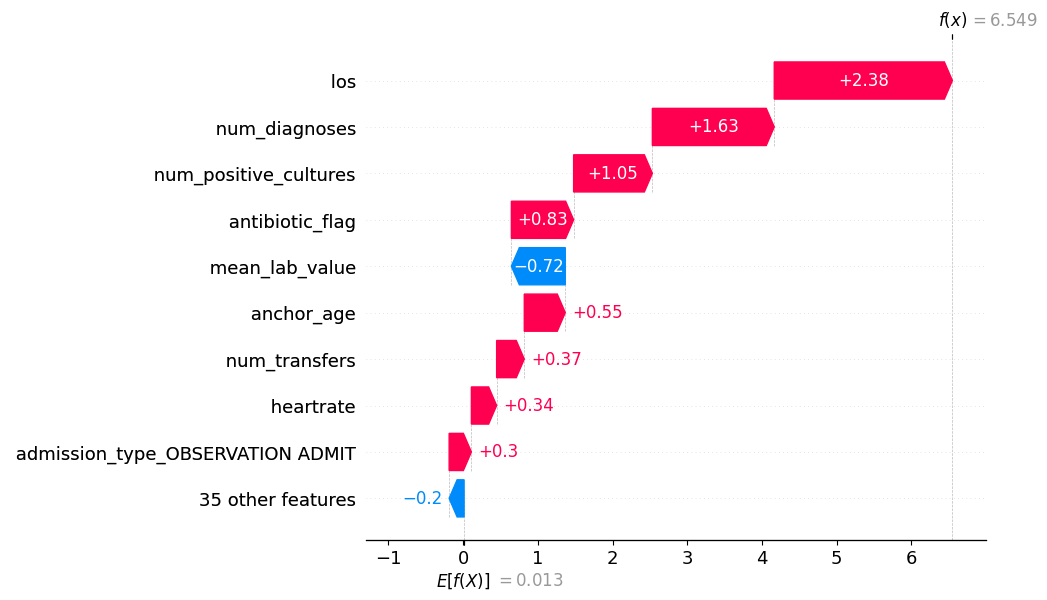

In [28]:
# -------------------------------------------------
# Interpretabilidad con SHAP para modelo XGBoost
# -------------------------------------------------

# Asegurar que los datos de entrada sean numéricos
X_train_numeric = X_train.astype(np.float64)
X_test_numeric = X_test.astype(np.float64)

# Crear el explainer para XGBoost
explainer = shap.TreeExplainer(results["XGBoost"]["model"])

# Calcular valores SHAP
shap_values = explainer.shap_values(X_test_numeric)

# Detectar si shap_values es lista (por clases) o matriz (binaria)
if isinstance(shap_values, list):
    shap_vals_to_plot = shap_values[1]  # clase positiva
    expected_val = explainer.expected_value[1]
else:
    shap_vals_to_plot = shap_values
    expected_val = explainer.expected_value

# ---------------------------------------------
# Visualizaciones SHAP
# ---------------------------------------------

# 1. Importancia global de variables
shap.summary_plot(shap_vals_to_plot, X_test_numeric, plot_type="bar")

# 2. Distribución de contribuciones (beeswarm)
shap.summary_plot(shap_vals_to_plot, X_test_numeric)

# 3. Waterfall plot para el mismo paciente
shap.plots._waterfall.waterfall_legacy(
    expected_val,
    shap_vals_to_plot[0],
    X_test_numeric.iloc[0]
)


Los resultados de SHAP confirman la relevancia de variables como el número de procedimientos, la duración de la estancia o ciertos signos vitales en la predicción del riesgo de infección. Además, el análisis individualizado muestra cómo estas variables interactúan para justificar cada caso específico, favoreciendo la trazabilidad de decisiones clínicas automatizadas.

Esta capacidad explicativa local resulta particularmente útil cuando se busca confianza en modelos predictivos dentro de entornos hospitalarios.